👨‍🎓 Integrantes:

Alice C. M. Assis - RM 566233

Leonardo S. Souza - RM 563928

Lucas B. Francelino - RM 561409

Pedro L. T. Silva - RM 561644

Vitor A. Bezerra - RM 563001

GitHub: 

https://github.com/Lesasouza/fiap_sprint3_reply

1. 🔍 Análise Exploratória dos Dados

🔍 Importação de bibliotecas especializadas para análise de equipamentos industriais

Nesta célula, são importadas bibliotecas essenciais para análise de dados e pré-processamento e modelagem (sklearn). Essas ferramentas fornecem funcionalidades fundamentais para manipulação de datasets, transformação de variáveis e construção de modelos preditivos eficientes.

In [120]:
# 🔍 Importação de bibliotecas especializadas para análise de dados agrícolas

# ------------------------------
# 📊 Manipulação e Visualização
# ------------------------------
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
import plotly.express as px
import plotly.graph_objects as go

# ------------------------------
# 🔄 Pré-processamento
# ------------------------------
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.model_selection import GridSearchCV

# ------------------------------
# 🤖 Modelagem (Classificadores)
# ------------------------------
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import (
    RandomForestClassifier,
    GradientBoostingClassifier,
    AdaBoostClassifier,
    BaggingClassifier,
    ExtraTreesClassifier
)
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.calibration import CalibratedClassifierCV

# ------------------------------
# 🧪 Avaliação de Desempenho
# ------------------------------
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    confusion_matrix,
    classification_report,
    roc_auc_score
)

# ------------------------------
# ⚙️ Utilitários
# ------------------------------
import random
import time
import os

📂 Definição do caminho de acesso aos dados da lavoura

Aqui, o caminho do arquivo .csv contendo os dados agrícolas é definido em uma variável. Essa prática torna o código mais organizado e permite reutilizar facilmente o caminho do arquivo ao longo do notebook, facilitando ajustes e reaproveitamento do script.

In [121]:
#📂 Definição do caminho de acesso aos dados da lavoura

csv_path = "C:\\PYTHON\\fiap_sprint3_reply\\src\\machine_learning\\jupyter\\LEITURA_SENSOR_FALHA_AJUSTADO.txt"
cols = [
    "Data_leitura",
    "Lux",
    "Temperatura",
    "Vibracao",
    "Classe"  # Variável target a condição do equipamento [1, 2, 3]
    ]

📥 Carregamento do dataset para estrutura tabular do pandas

Esta etapa carrega os dados do arquivo CSV para um DataFrame, a estrutura de dados mais comum do pandas. Isso permite o uso de diversas ferramentas para exploração, limpeza e análise estatística dos dados morfométricos de sementes de trigo.

In [122]:
#📥 Carregamento do dataset para estrutura tabular do pandas

#df = pd.read_csv(csv_path, sep=r'\s+', names=cols)
#df2 = df.copy()

df = pd.read_csv(csv_path, sep=r'\s+', names=cols)
df['Lux'] = df['Lux'] / 1000  # Aplica fator de divisão por 1000 na leitura do Lux
df['Vibracao'] = df['Vibracao'] * 10  # Aplica fator de divisão por 1000 na leitura da Vibração
df2 = df.copy()

🧾 Substituição dos Códigos de Classe pelos Nomes das Variedades

O dataset original possui a variável `Classe` representada por valores numéricos:

- `1` para *Falha_1*
- `2` para *Falha_2*
- `3` para *Estavel*

Para facilitar a interpretação dos resultados e a visualização dos dados, realizamos a substituição desses valores numéricos pelos nomes correspondentes das variedades de trigo diretamente no DataFrame `df`.

In [123]:
# 🧾 Substituir valores numéricos da Classe pelos nomes das variedades
nomes_classes = {1: "Falha_1", 2: "Falha_2", 3: "Estavel"}
df["Classe"] = df["Classe"].map(nomes_classes)

🔎 Inspeção inicial do dataset para compreensão de variáveis e formato

Visualizar as primeiras linhas do DataFrame com df.head() serve como um ponto de partida para compreender a estrutura do dataset, verificar nomes de colunas, tipos de variáveis (como Lux, Temperatura e Vibração) e identificar possíveis anomalias logo no início. 

In [124]:
#🔎 Inspeção inicial do dataset para compreensão de variáveis e formato

df.head()

,Data_leitura,Lux,Temperatura,Vibracao,Classe
0,13:53:12.826855,41.450747,-8.277930,16.614177,Falha_2
1,14:36:24.826855,47.717985,38.695123,23.572283,Falha_2
2,15:19:36.826855,25.914008,24.894656,35.944093,Falha_2
3,16:02:48.826855,7.791510,17.589942,9.183609,Falha_1
4,16:46:00.826855,26.093959,35.899009,4.988746,Falha_2


📐 Verificação da dimensão do conjunto de dados (linhas × colunas)

Com df.shape, obtemos a dimensão do DataFrame, ou seja, o número de amostras e de atributos. Isso ajuda a dimensionar a complexidade da base, identificar se há dados suficientes e planejar estratégias de modelagem com base no volume de dados.

In [125]:
#📐 Verificação da dimensão do conjunto de dados (linhas × colunas)

df.shape # 210 linhas e 8 colunas

(600, 5)

🧾 Extração dos nomes das colunas para facilitar manipulação e seleção

Listar df.columns permite confirmar os nomes das variáveis, especialmente útil para selecionar subconjuntos de dados, configurar o eixo de gráficos ou usar nomes programaticamente em modelagens e pipelines.

In [126]:
#🧾 Extração dos nomes das colunas para facilitar manipulação e seleção

df.columns

Index(['Data_leitura', 'Lux', 'Temperatura', 'Vibracao', 'Classe'], dtype='object')

🧬 Checagem dos tipos de dados de cada variável

Usando df.dtypes, identificamos se os dados estão corretamente interpretados pelo pandas. Por exemplo, colunas numéricas devem estar como float ou int, enquanto variáveis categóricas podem estar como object ou category. Essa etapa é fundamental para detectar conversões necessárias para análise estatística ou aprendizado de máquina.

In [127]:
#🧬 Checagem dos tipos de dados de cada variável

df.dtypes


Data_leitura     object
Lux             float64
Temperatura     float64
Vibracao        float64
Classe           object
dtype: object

🚨 Detecção de dados faltantes para avaliar necessidade de imputação

Esta célula analisa a presença de valores nulos usando df.isnull().sum(). A presença de dados ausentes pode comprometer a análise e os modelos, sendo necessário aplicar técnicas como imputação, remoção de linhas/colunas ou modelagem com tolerância a nulos.

In [128]:
df.isnull().sum() # nao existe nem um nulo

Data_leitura    0
Lux             0
Temperatura     0
Vibracao        0
Classe          0
dtype: int64

🧹 Limpeza de dados redundantes

O método drop_duplicates() remove todas as entradas repetidas, mantendo apenas a primeira ocorrência. O argumento inplace=True faz com que a modificação seja feita diretamente no DataFrame original (df), sem a necessidade de reatribuição, remover duplicatas é uma etapa importante na preparação dos dados, pois ajuda a garantir a qualidade, consistência e confiabilidade das análises e dos modelos de aprendizado de máquina.

In [129]:
#🧹 Limpeza de dados redundantes

#Verificaçã de Duplicatas → Verifica se existem linhas duplicadas no DataFrame
df.duplicated().sum() # → Retorna 0, indicando que não há duplicatas

#Limpeza de dados redundantes (exemplo)
#df.drop_duplicates(inplace=True)

np.int64(0)

📊 Estatísticas descritivas para análise quantitativa preliminar

Com df.describe(), obtemos medidas estatísticas como média, mediana, desvio padrão e quartis para variáveis numéricas. Isso fornece uma noção do comportamento e da dispersão dos dados, ajudando a identificar outliers e padrões.

• Lux → valores consistentes, distribuição normalizada.

• Temperatura → muito variável, com outliers que podem distorcer análises.

• Vibração → comportamento regular e estável.

In [130]:
#📊 Estatísticas descritivas para análise quantitativa preliminar

df.describe()

,Lux,Temperatura,Vibracao
count,600.000000,600.000000,600.000000
mean,50.544127,26.054717,18.145472
std,27.960352,36.149510,11.666723
min,0.096751,-44.851490,0.055048
25%,26.387327,-5.295457,7.850689
50%,49.684842,26.621196,17.780308
75%,75.817961,56.849814,27.069603
max,99.856394,94.852348,44.787107


🌾 Distribuição das variedades defeitos nos equipamentos (variável target)

Com value_counts(), observamos a distribuição da variável target, que representa o tipo de condição do equipamento. Esse passo permite entender o equilíbrio entre as classes e verificar se há desbalanceamento. Um desbalanceamento severo poderia impactar negativamente o desempenho dos modelos preditivos. Nesta base, as variedades estão relativamente equilibradas, favorecendo o uso de validação cruzada sem necessidade de técnicas de reamostragem.

In [131]:
#🌾 Distribuição das sementes agrícolas (variável target)

df['Classe'].value_counts()

Classe
Falha_2    216
Estavel    194
Falha_1    190
Name: count, dtype: int64

📄 Exibição do dataset arredondado

Por fim, a base é exibida com valores arredondados para facilitar a leitura e a apresentação. Essa prática é útil para inspeção visual, identificação de padrões e construção de relatórios. Embora não afete o desempenho computacional dos modelos (que devem usar os dados originais), o arredondamento é uma boa prática para dashboards e validação visual de entradas.

In [132]:
#📄 Exibição do dataset arredondado

df2_format = df2.round(2)
display(df2_format)

,Data_leitura,Lux,Temperatura,Vibracao,Classe
0,13:53:12.826855,41.45,-8.28,16.61,2
1,14:36:24.826855,47.72,38.70,23.57,2
2,15:19:36.826855,25.91,24.89,35.94,2
3,16:02:48.826855,7.79,17.59,9.18,1
4,16:46:00.826855,26.09,35.90,4.99,2
...,...,...,...,...,...
595,10:17:12.826855,67.11,62.15,2.77,1
596,11:00:24.826855,90.13,40.85,9.46,2
597,11:43:36.826855,62.67,48.14,28.15,3
598,12:26:48.826855,74.07,-7.75,27.08,2


🗂️ Definição das colunas utilizadas para cada tipo de gráfico

Aqui criamos variáveis contendo os nomes das colunas utilizadas nos gráficos, facilitando a reutilização e tornando o código mais limpo e compreensível.

In [133]:
# ================================
# CONFIGURAÇÕES GERAIS DOS GRÁFICOS
# ================================

# 📦 Variáveis numéricas principais usadas em análises
variaveis_numericas = [
    "Lux",
    "Temperatura",
    "Vibracao"
]

# 🎯 Coluna categórica de agrupamento
coluna_target = "Classe"

# ================================
# BOXPLOT INTERATIVO
# ================================
boxplot_cols = variaveis_numericas  # Colunas numéricas para o boxplot
boxplot_target_col = coluna_target  # Coluna para o eixo X
boxplot_title = 'Boxplot Interativo das Variáveis por Condição do Equipamento'  # Título do gráfico
boxplot_xaxis_title = 'Condição do Equipamento'  # Título do eixo X
boxplot_yaxis_title = 'Valor'  # Título do eixo Y
boxplot_legend_title = 'Variável'  # Título da legenda
boxplot_height = 600  # Altura da figura
boxplot_width = 1200  # Largura da figura
boxplot_mode = 'group'  # Modo de exibição: 'group' ou 'overlay'

# ================================
# GRÁFICO DE DISPERSÃO
# ================================
scatter_x = 'Lux'  # Variável para o eixo X
scatter_y = 'Temperatura'  # Variável para o eixo Y
scatter_figsize = (18, 10)  # Tamanho da figura

# ================================
# GRÁFICO DE BARRAS AGRUPADAS
# ================================
bar_target_col = coluna_target  # Coluna para agrupamento
bar_cols = variaveis_numericas  # Colunas para calcular a média
bar_title = 'Média de Lux, Temperatura e Vibração por Condição'  # Título do gráfico
bar_xtarget = 'Equipamento'  # Título do eixo X
bar_ytarget = 'Valor Médio'  # Título do eixo Y
bar_legend_title = 'Variável'  # Título da legenda
bar_palette = 'Set2'  # Paleta de cores
bar_figsize = (16, 6)  # Tamanho da figura
bar_value_name = 'Valor'  # Nome da coluna de valores no melt

# ================================
# MATRIZ DE CORRELAÇÃO
# ================================
corr_cmap = 'coolwarm'  # Mapa de cores
corr_xtick_rotation = 45  # Rotação dos rótulos do eixo X

# ================================
# PAIRPLOT
# ================================
pairplot_vars = variaveis_numericas  # Variáveis para o pairplot
pairplot_hue = coluna_target  # Variável para coloração
pairplot_title = 'Pairplot com Coloração por Condição do Equipamento'  # Título do gráfico

📊 Boxplot interativo das variáveis por Tipo de Semente

Foi criado um boxplot interativo com Plotly para visualizar a distribuição das variáveis numéricas de cada tipo de condição do equipamento. Através da função `melt()`, a base foi transformada para o formato longo, permitindo o agrupamento por classe (target) e por variável. Esse gráfico revela diferenças significativas nas medianas e amplitudes interquartis, além da presença de potenciais outliers. Por exemplo, as variedades Kama e Canadian apresentam padrões distintos em variáveis como Compacidade e Comprimento do Sulco do Núcleo. Essas diferenças são úteis para a criação de modelos de classificação baseados em características físicas das sementes.

In [134]:
#📊 Boxplot interativo das variáveis

df_long = df.melt(id_vars=boxplot_target_col,
                  value_vars=boxplot_cols,
                  var_name=boxplot_legend_title,
                  value_name=boxplot_yaxis_title)

fig = px.box(df_long,
             x=boxplot_target_col,
             y=boxplot_yaxis_title,
             color=boxplot_legend_title,
             points='all',
             title=boxplot_title)

fig.update_layout(
    xaxis_title=boxplot_xaxis_title,
    yaxis_title=boxplot_yaxis_title,
    boxmode=boxplot_mode,
    xaxis_tickangle=-45,
    legend_title=boxplot_legend_title,
    height=boxplot_height,
    width=boxplot_width
)
fig.show()

🔬 Dispersão entre Comprimento e Largura do Núcleo

O gráfico de dispersão entre o Comprimento e a Largura do Núcleo permite observar padrões visuais e possíveis agrupamentos entre as diferentes condições do equipamento. Embora não haja uma correlação linear perfeita, é possível identificar tendências distintas entre as variedades. Por exemplo, certas classes exibem aglomerações em regiões específicas do gráfico, sugerindo que essas duas variáveis combinadas podem ser úteis para distinguir entre os tipos de condições. Esta análise visual é um passo importante na compreensão da separabilidade entre classes e auxilia na escolha de variáveis para modelos de classificação.


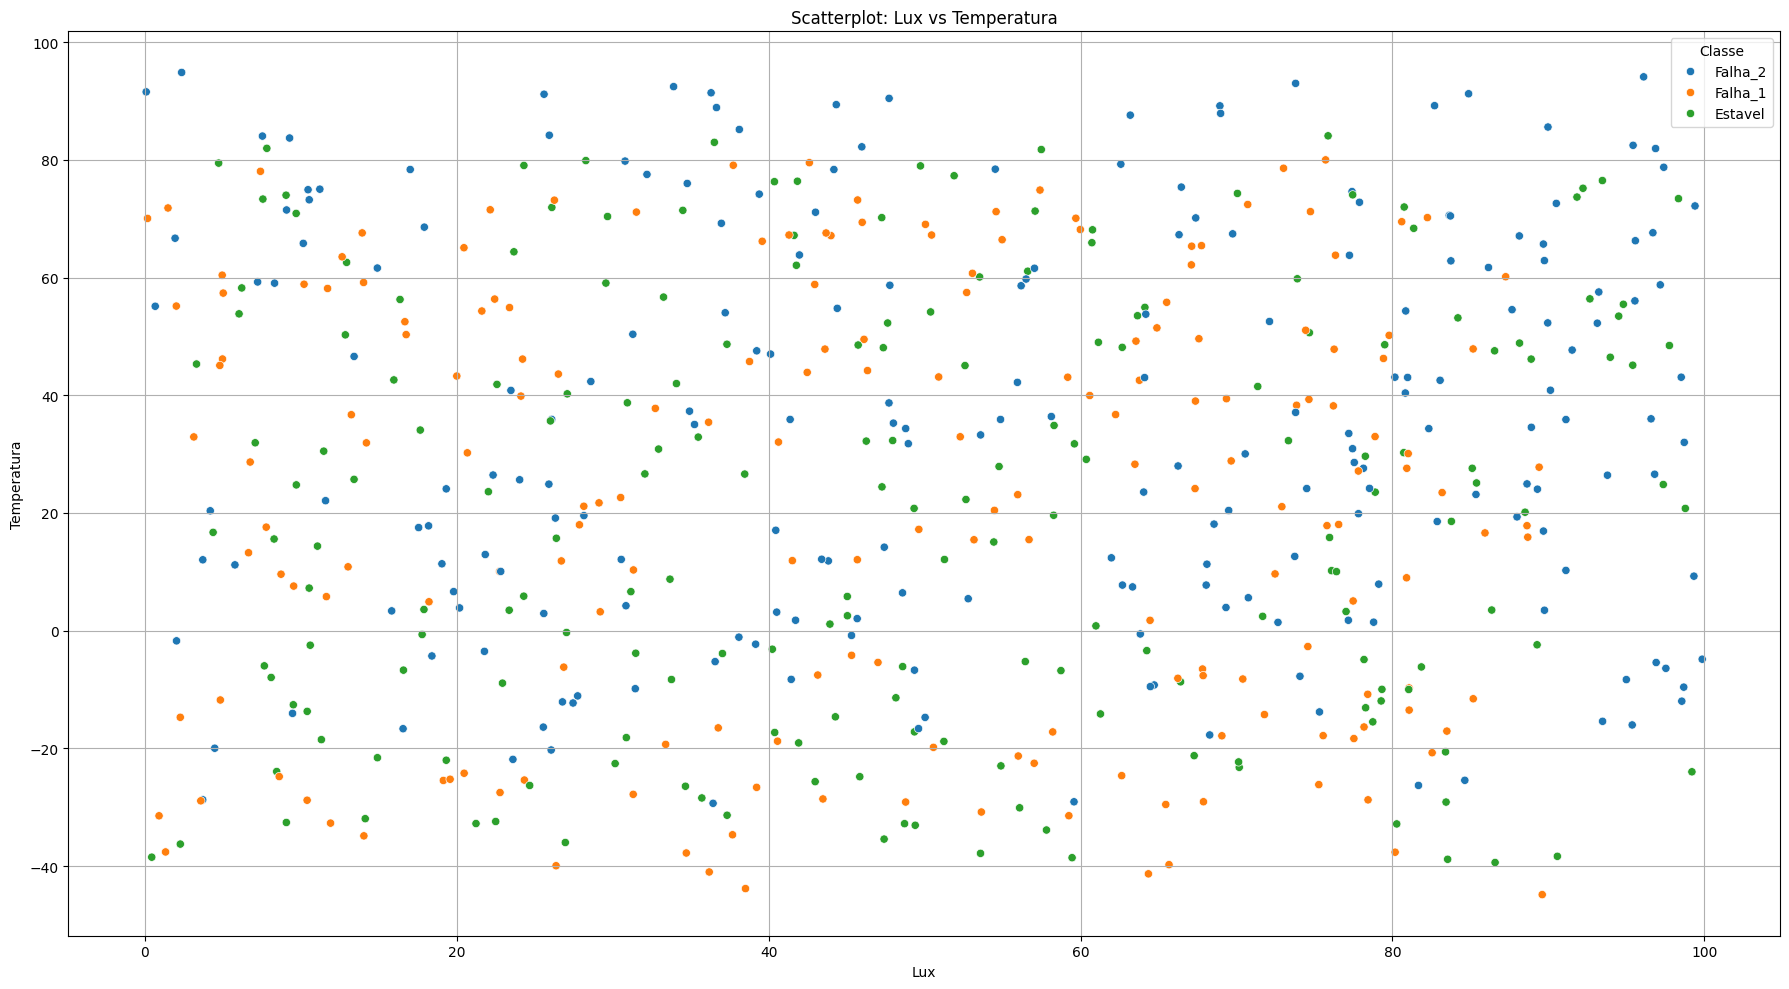

In [135]:
#🔬 Dispersão entre Comprimento e Largura do Núcleo

plt.figure(figsize=scatter_figsize)
sns.scatterplot(data=df, x=scatter_x, y=scatter_y, hue=coluna_target, palette='tab10')
plt.title(f'Scatterplot: {scatter_x} vs {scatter_y}')
plt.xlabel(scatter_x)
plt.ylabel(scatter_y)
plt.grid(True)
plt.legend(title=coluna_target)
plt.tight_layout()
plt.show()

🧪 Média das características morfológicas por tipo de semente (gráfico de barras agrupadas)

Utiliza-se o método `groupby` para calcular as médias de Área, Perímetro e Compacidade para cada condição do equipamento, representadas em um gráfico de barras agrupadas com Seaborn. Observa-se que diferentes variedades apresentam médias distintas nessas variáveis, o que evidencia padrões morfológicos característicos de cada classe. Por exemplo, uma variedade pode possuir maior área média e menor compacidade em comparação com as demais. Essas diferenças são úteis para entender a estrutura dos dados e apoiar a construção de modelos de classificação baseados em medidas físicas sobre as condições.

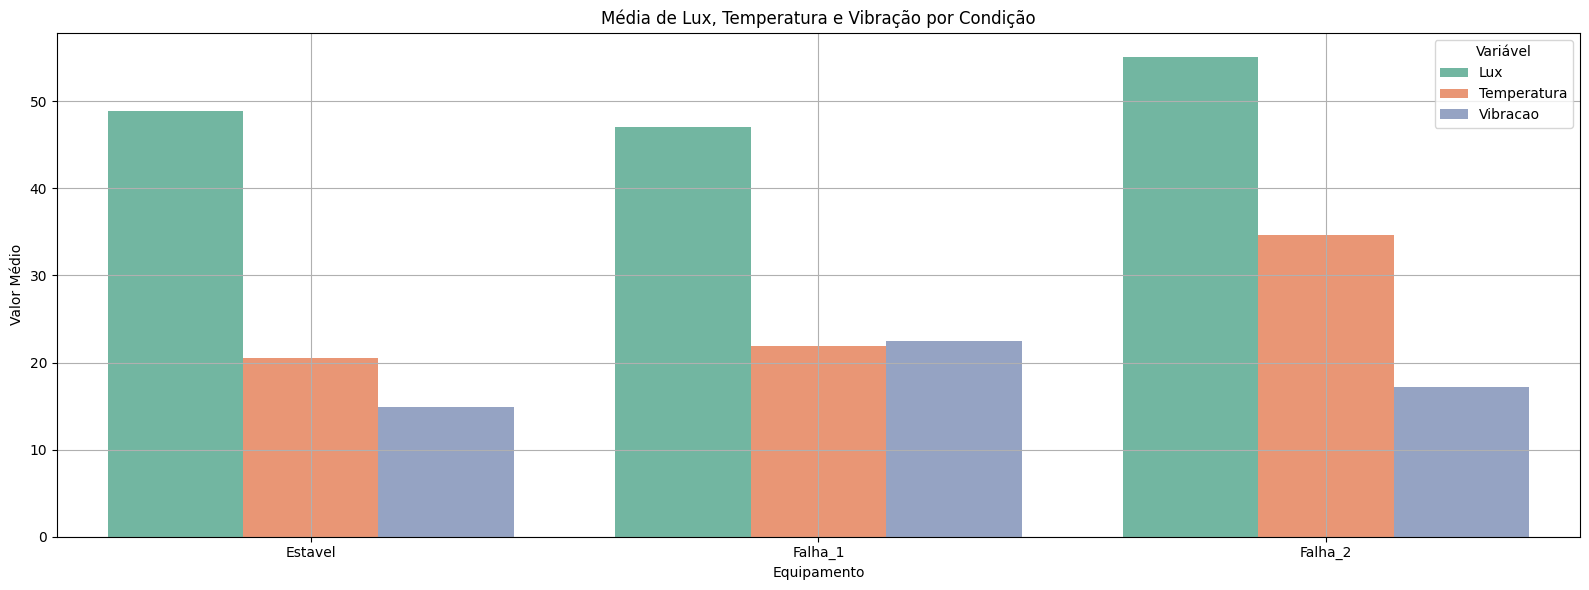

In [136]:
#🧪 Média das características morfológicas por tipo de semente (gráfico de barras agrupadas)

df_bar = df.groupby(bar_target_col)[bar_cols].mean().reset_index()
df_bar_melted = df_bar.melt(id_vars=bar_target_col,
                            value_vars=bar_cols,
                            var_name=bar_legend_title,
                            value_name=bar_value_name)

plt.figure(figsize=bar_figsize)
sns.barplot(data=df_bar_melted, x=bar_target_col, y=bar_value_name, hue=bar_legend_title, palette=bar_palette)
plt.title(bar_title)
plt.xlabel(bar_xtarget)
plt.ylabel(bar_ytarget)
plt.legend(title=bar_legend_title)
plt.grid(True)
plt.tight_layout()
plt.show()

🔥 Matriz de correlação entre variáveis numéricas

Através do heatmap com `annot=True`, visualiza-se a correlação entre as variáveis contínuas do conjunto de dados. Essa análise é útil para identificar relações lineares entre as características morfológicas das sementes, o que pode influenciar o desempenho de certos algoritmos, especialmente os baseados em relações lineares, como a Regressão Logística ou Linear.

Dentre os destaques:

- Há forte correlação positiva entre variáveis como **Área** e **Perímetro**, indicando que sementes com maior área tendem também a ter perímetros maiores.
- **Comprimento do Sulco do Núcleo** mostra correlação relevante com várias outras variáveis, podendo ser uma característica importante na separação das classes.
- A variável **Compacidade** apresenta correlação negativa com **Perímetro** e **Comprimento do Núcleo**, o que sugere que sementes mais compactas podem ter formas morfologicamente distintas.

Compreender essas correlações ajuda a detectar multicolinearidade, evitar redundância nos modelos e selecionar variáveis com maior poder discriminativo para tarefas de classificação.

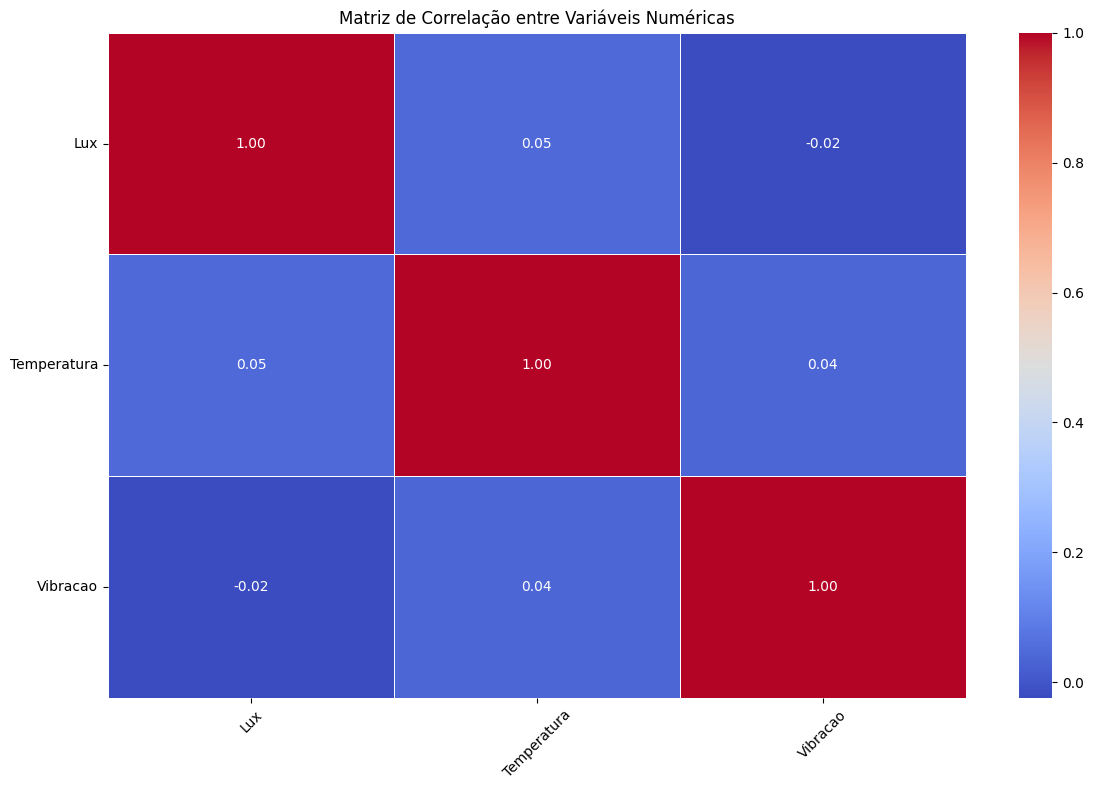

In [137]:
#🔥 Matriz de correlação entre variáveis numéricas

plt.figure(figsize=(12, 8))
corr_matrix = df[variaveis_numericas].corr()
sns.heatmap(corr_matrix, annot=True, cmap=corr_cmap, fmt='.2f', linewidths=0.5)
plt.title('Matriz de Correlação entre Variáveis Numéricas')
plt.xticks(rotation=corr_xtick_rotation)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

🔎 Pairplot com coloração por Tipo de Semente

O pairplot permite examinar relações bivariadas entre variáveis numéricas, com coloração baseada na variável `Classe`, que representa a condição do equipamento. Essa visualização é útil para avaliar a separabilidade visual entre as classes e identificar padrões relevantes para classificação.

Lux e Temperatura isoladamente não ajudam muito na distinção, mas Vibração parece ser o melhor preditor, principalmente para identificar Falha_1.

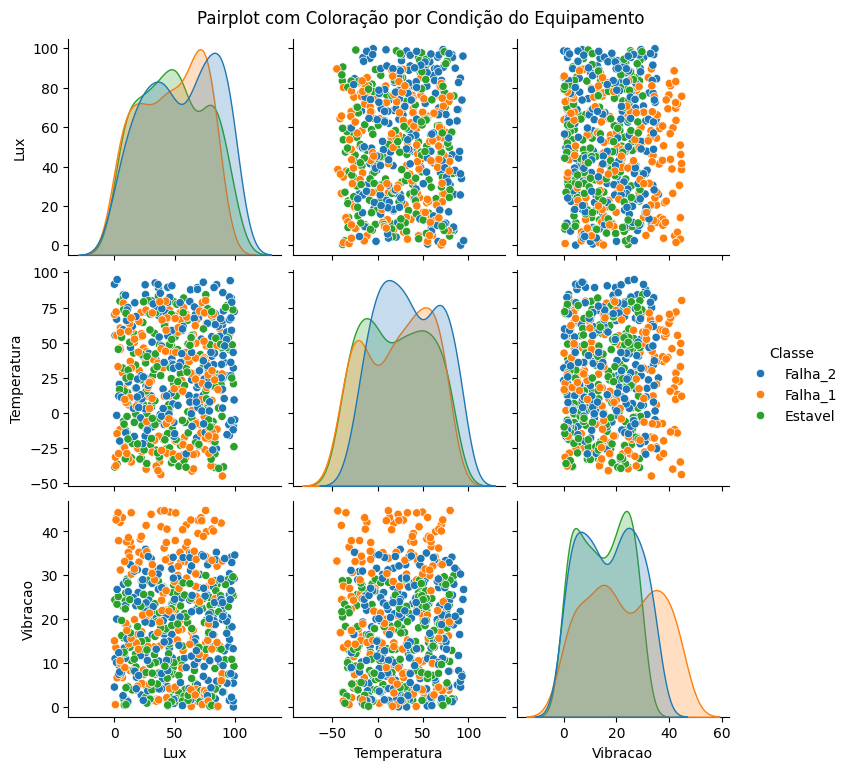

In [138]:
#🔎 Pairplot com coloração por Tipo de Semente

sns.pairplot(df[pairplot_vars + [pairplot_hue]], hue=pairplot_hue, palette='tab10')
plt.suptitle(pairplot_title, y=1.02)
plt.show()

📊 Detecção e tratamento de valores extremos com IQR 

Esta célula tem o objetivo de identificar e tratar outliers (valores fora do padrão esperado) nas variáveis morfológicas das sementes, utilizando o método do Intervalo Interquartil (IQR). Tratar outliers é essencial para evitar distorções em modelos de classificação e estatísticas descritivas, especialmente em algoritmos sensíveis a valores extremos, como KNN e Regressão Logística.

In [139]:
#📊 Detecção e tratamento de valores extremos com IQR

# Remoção de outliers usando o método do IQR
def remover_outliers_iqr_com_log(df, colunas):
    df_limpo = df.copy()
    removidos = {}
    for col in colunas:
        Q1 = df_limpo[col].quantile(0.25)
        Q3 = df_limpo[col].quantile(0.75)
        IQR = Q3 - Q1
        limite_inferior = Q1 - 1.5 * IQR
        limite_superior = Q3 + 1.5 * IQR
        
        mask_outliers = (df_limpo[col] < limite_inferior) | (df_limpo[col] > limite_superior)
        removidos[col] = df_limpo[mask_outliers].index.tolist()
        
        df_limpo = df_limpo[~mask_outliers]
    
    return df_limpo, removidos

# Aplicar remoção de outliers
df_sem_outliers, linhas_removidas = remover_outliers_iqr_com_log(df, variaveis_numericas)

# Exibir os índices das linhas removidas para cada coluna
print("===== Sumário Índices das Linhas Removidas por Outliers =====")
for col, indices in linhas_removidas.items():
    total = len(indices)
    print(f"Outliers removidos na coluna '{col}': {indices} (Total: {total})")

===== Sumário Índices das Linhas Removidas por Outliers =====
Outliers removidos na coluna 'Lux': [] (Total: 0)
Outliers removidos na coluna 'Temperatura': [] (Total: 0)
Outliers removidos na coluna 'Vibracao': [] (Total: 0)


🎯 Quantificação das classes da variável alvo restantes após remoção de outliers

Este trecho de código exibe a contagem das variedades de trigo após a remoção de valores extremos, permitindo verificar o balanceamento das classes no dataset. Isso é importante para avaliar o impacto da limpeza nos dados disponíveis para treinamento e validação dos modelos.

In [147]:
#🎯 Quantificação das classes da variável alvo restantes após remoção de outliers

# Contar as classes restantes após remoção de outliers
contagem_classes = df_sem_outliers[coluna_target].value_counts()

# Variedades não-outliers
contagem_classes = df_sem_outliers[coluna_target].value_counts()
print("🔍 Contagem por Condição após remoção de outliers:")
print(contagem_classes)

🔍 Contagem por Condição após remoção de outliers:
Classe
Falha_2    216
Estavel    194
Falha_1    190
Name: count, dtype: int64


📊 Estatísticas descritivas para análise quantitativa preliminar

Com df.describe(), obtemos medidas estatísticas como média, mediana, desvio padrão e quartis para variáveis numéricas. Isso fornece uma noção do comportamento e da dispersão dos dados, ajudando a identificar outliers e padrões.

In [141]:
#📊 Estatísticas descritivas para análise quantitativa preliminar

df.describe()

,Lux,Temperatura,Vibracao
count,600.000000,600.000000,600.000000
mean,50.544127,26.054717,18.145472
std,27.960352,36.149510,11.666723
min,0.096751,-44.851490,0.055048
25%,26.387327,-5.295457,7.850689
50%,49.684842,26.621196,17.780308
75%,75.817961,56.849814,27.069603
max,99.856394,94.852348,44.787107


🌾 Análise do Perfil Médio Morfológico por Variedade

Este script calcula e exibe o perfil morfológico médio das sementes de trigo (sem outliers), agrupado por tipo de variedade, usando um gráfico radar interativo. As variáveis envolvem características físicas como área, perímetro, compacidade, comprimento e largura do núcleo, coeficiente de assimetria e comprimento do sulco.

Esse perfil pode ser usado para entender visualmente as diferenças entre as variedades e como elas se distribuem nas dimensões analisadas.

In [148]:
#🌾 Análise do Perfil Médio Morfológico por Variedade

# Calcular perfil ideal sem outliers (médias agrupadas por classe)
perfil_ideal_sem_outliers = df_sem_outliers.groupby(coluna_target)[variaveis_numericas].mean().round(2)

# Criar gráfico radar com Plotly e Exibir

# Exibir perfil ideal
print("📶 Perfil ideal das características dos sensores por equipamento:")
print(perfil_ideal_sem_outliers)


# Gráfico radar interativo

categorias = list(perfil_ideal_sem_outliers.columns)

cores = ["#3235FF", "#FE4032", "#F3E416"]

fig = go.Figure()

for i, variedade in enumerate(perfil_ideal_sem_outliers.index):
    valores = perfil_ideal_sem_outliers.loc[variedade].values.flatten().tolist()
    valores += valores[:1]  # fechar ciclo

    fig.add_trace(go.Scatterpolar(
        r=valores,
        theta=categorias + [categorias[0]],
        fill='toself',
        name=variedade,
        line=dict(color=cores[i % len(cores)], width=2.5),
        hoverinfo='text',
        text=[f'{v:.2f}' for v in valores]
    ))

fig.update_layout(
    polar=dict(
        radialaxis=dict(
            visible=True,
            range=[0, max(perfil_ideal_sem_outliers.max()) * 1.2]
        )
    ),
    title="📶 Perfil ideal dos sensores por condição (sem outliers)",
    showlegend=True,
    height=600,
    width=600,
    legend_title_text='Variedades'
)

fig.show()

📶 Perfil ideal das características dos sensores por equipamento:
           Lux  Temperatura  Vibracao
Classe                               
Estavel  48.85        20.57     14.91
Falha_1  47.07        21.92     22.49
Falha_2  55.12        34.62     17.23


📊 Relatório – Análise Detalhada do Dataset “Leitura_Sensores” (Condição do Equipamento)

 1. Perfil Morfológico Médio por Variedade  
Após remoção de outliers, as médias das sete características físicas nas três classes foram:

| Variedade | Área | Perímetro | Compacidade | Compr. Núcleo | Larg. Núcleo | Assimetria | Compr. Sulco |
|-----------|-----:|----------:|------------:|--------------:|-------------:|-----------:|-------------:|
| **Canadian** | 11.85 | 13.23 | 0.85 | 5.22 | 2.85 | 4.68 | 5.11 |
| **Kama**     | 14.33 | 14.29 | 0.88 | 5.51 | 3.24 | 2.67 | 5.09 |
| **Rosa**     | 18.33 | 16.14 | 0.88 | 6.15 | 3.68 | 3.64 | 6.02 |

- **Tamanho Geral**: ‘Rosa’ > ‘Kama’ > ‘Canadian’ em área e perímetro.
- **Formas**: ‘Kama’ e ‘Rosa’ têm compacidade maior (sementes mais “cheias”) que ‘Canadian’.
- **Dimensões do Núcleo**: ‘Rosa’ mostra maior comprimento e largura, facilitando distinção.
- **Assimetria**: ‘Canadian’ é a mais irregular; ‘Kama’ a mais simétrica.
- **Sulco do Núcleo**: ‘Rosa’ possui sulco mais longo, ligeiramente acima de ‘Canadian’ e ‘Kama’.

---

 2. Correlações entre Atributos  
A matriz de correlação revela:

- **Área ↔ Perímetro** (≈ 0.99): redundância muito alta entre essas duas medidas.
- **Área/Perímetro ↔ Comprimento e Largura do Núcleo** (≈ 0.95–0.97): sementes maiores em área também têm núcleo maior.
- **Compacidade** tem correlação moderada (≈ 0.5–0.8) com dimensões do núcleo, mas menor com as medidas gerais de tamanho.
- **Assimetria** apresenta correlação fraca (≈ –0.3 a 0.0) com as demais, tornando-se atributo de alto valor informativo.
- **Comprimento do Sulco** correlaciona-se fortemente com perímetro e comprimento do núcleo (≈ 0.86–0.93).

> **Insight**: para reduzir redundância, pode-se eliminar uma das medidas gerais (Área ou Perímetro) ou aplicar técnicas como PCA. Variáveis pouco correlacionadas (Assimetria, Compacidade) são cruciais para discriminar classes.

---

 3. Separabilidade Visual  
- **Pairplot** e **Scatterplots** mostram que:
  - ‘Rosa’ aparece agrupada em regiões de maiores valores (área e núcleo).
  - ‘Canadian’ fica concentrada em quadrantes de menor dimensão.
  - ‘Kama’ ocupa intermediário, com sobreposição parcial em todas as combinações.
- Combinações como **Área vs Comprimento do Núcleo** e **Perímetro vs Largura do Núcleo** apresentam clara separabilidade entre extremos (‘Rosa’ x ‘Canadian’) e ajudam a identificar limites de decisão.

---

 4. Conclusões sobre o Dataset  
- Existem diferenças marcantes no perfil morfológico das três variedades, principalmente em dimensões de tamanho e forma do núcleo.
- A alta correlação entre algumas variáveis sugere otimizar a representatividade reduzindo atributos redundantes.
- A assimetria e o comprimento do sulco oferecem variabilidade única que pode melhorar qualquer análise ou modelo de classificação.
- A clareza de agrupamentos em múltiplas projeções indica viabilidade de separar confortavelmente as três classes com métodos estatísticos ou de aprendizado, desde que aproveitem tanto variáveis fortemente correlacionadas quanto aquelas independentes.

Este entendimento profundo do **Seeds Dataset** fornece a base para todas as etapas posteriores de pré-processamento, seleção de atributos e modelagem.


🎯 Separando os dados em variáveis preditoras e variável target 

Nesta etapa, fazemos a divisão dos dados em:

X: variáveis preditoras (features), que contêm medidas físicas das sementes — como Área, Perímetro, Compacidade, Comprimento e Largura do Núcleo, Coeficiente de Assimetria e Comprimento do Sulco do Núcleo. Essas serão as entradas para os modelos.
y: variável target (rótulo), que indica a variedade de trigo (Kama, Rosa ou Canadian) que queremos prever.

Essa separação é fundamental para o treinamento dos modelos de machine learning, pois permite que eles aprendam a relação entre as características morfológicas das sementes (X) e a sua variedade (y).

In [143]:
#🎯 Separando os dados em variáveis preditoras e variável target 

X = df.drop(columns=[coluna_target])  
y = df[coluna_target]                

🎯 Conversão da variável alvo categórica para formato numérico

Algoritmos de machine learning geralmente exigem que a variável alvo (target) esteja em formato numérico. Esta etapa utiliza o LabelEncoder, e em casos mais complexos o One-Hot Enconding (como exemplificado abaixo), para transformar categorias textuais (como o tipo de semente) em números, preservando a associação entre as classes e preparando os dados para o treinamento supervisionado.

In [144]:
#🎯 Conversão da variável alvo categórica para formato numérico

le = LabelEncoder()
y_enc = le.fit_transform(y)

#Lista de colunas categóricas e aplicação de One-Hot Encoding caso fosse necessário
categorical_cols = []

#Exemplo de aplicação de One-Hot Encoding
if categorical_cols:
    ohe = OneHotEncoder(handle_unknown='ignore')
    X_encoded = pd.DataFrame(
        ohe.fit_transform(X[categorical_cols]).toarray(),
        index=X.index
    )
    X_encoded = X_encoded.add_prefix('OHE_')

    #Remover colunas categóricas do DataFrame original (exemplo)
    X = X.drop(categorical_cols, axis=1)

    #Concatenar o DataFrame original com o DataFrame codificado (exemplo)
    X  = pd.concat([X, X_encoded], axis=1)

✂️ Separação dos dados em conjuntos de treino e teste com estratificação

Aqui os dados são divididos em conjuntos de treinamento e teste com base em uma proporção definida (80/20). O parâmetro stratify=y garante que a distribuição das classes da variável alvo seja preservada em ambas as amostras, o que é fundamental para garantir avaliações mais realistas e imparciais dos modelos.

In [151]:
#✂️ Separação dos dados em conjuntos de treino e teste com estratificação

X_train, X_test, y_train, y_test = train_test_split(
    X, y_enc, test_size=0.2, random_state=42, stratify=y_enc
)

📏 Escalonamento das variáveis numéricas para melhorar desempenho dos modelos

A normalização dos dados, feita com MinMaxScaler, ajusta as variáveis para uma mesma escala (geralmente de 0 a 1). Isso é crucial para algoritmos que são sensíveis à magnitude dos dados, como KNN e SVM, garantindo que nenhuma variável domine a modelagem apenas por ter valores maiores.

In [150]:
#📏 Escalonamento das variáveis numéricas para melhorar desempenho dos modelos

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

ValueError: could not convert string to float: '04:02:48.826855'

🔄 Configurar validação cruzada estratificada com StratifiedKFold 

Aqui, utilizamos o StratifiedKFold para criar 5 divisões (folds) dos dados que preservam a proporção original das classes em cada parte. Configuramos o embaralhamento dos dados (shuffle=True) para garantir aleatoriedade na divisão e definimos uma semente fixa (random_state=42) para resultados reproduzíveis, essa configuração assegura que o modelo seja avaliado de forma equilibrada e consistente em diferentes subconjuntos do conjunto de dados.

In [149]:
#🔄 Configurar validação cruzada estratificada com StratifiedKFold 

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

⚙️ Instanciação de modelos de aprendizado supervisionado para classificação

Nesta célula, criamos uma lista de 20 modelos de machine learning para classificação, com diferentes algoritmos e hiperparâmetros aleatórios. Os modelos incluem Regressão Logística, Árvore de Decisão, Random Forest, Gradient Boosting, SVM, KNN e Naive Bayes.

Para garantir diversidade, cada modelo recebe um nome único baseado em seus hiperparâmetros, evitando duplicatas. Essa variedade permite testar diferentes configurações e comparar seu desempenho na tarefa de prever a variedade de sementes de trigo a partir de suas medidas físicas.

In [ ]:
#⚙️ Instanciação de modelos de aprendizado supervisionado para classificação

# Funções auxiliares para gerar variações aleatórias
random_state = lambda: random.randint(1, 100)
n_estimators = lambda: random.choice([50, 100, 150, 200])
k_neighbors = lambda: random.choice([3, 5, 7, 10, 15])
max_depth = lambda: random.choice([None, 3, 5, 10])
kernels = ['linear', 'poly', 'rbf', 'sigmoid']
hidden_layer_sizes = lambda: random.choice([(50,), (100,), (50, 50), (100, 50)])

modelos = []
nomes_gerados = set()

while len(modelos) < 20:
    modelo_tipo = random.choice([
        'lr', 'dt', 'rf', 'gb', 'svm', 'knn', 'nb',
        'et', 'ada', 'lda', 'qda', 'mlp', 'bag', 'cal'
    ])
    
    if modelo_tipo == 'lr':
        nome = f'LogReg {random_state()}'
        if nome not in nomes_gerados:
            modelo = LogisticRegression(max_iter=1000, random_state=random_state())
            modelos.append((nome, modelo))
            nomes_gerados.add(nome)
    
    elif modelo_tipo == 'dt':
        depth = max_depth()
        nome = f'DecTree d{depth}'
        if nome not in nomes_gerados:
            modelo = DecisionTreeClassifier(max_depth=depth, random_state=random_state())
            modelos.append((nome, modelo))
            nomes_gerados.add(nome)
    
    elif modelo_tipo == 'rf':
        n = n_estimators()
        nome = f'RandForest {n}'
        if nome not in nomes_gerados:
            modelo = RandomForestClassifier(n_estimators=n, random_state=random_state())
            modelos.append((nome, modelo))
            nomes_gerados.add(nome)
    
    elif modelo_tipo == 'gb':
        n = n_estimators()
        nome = f'GradBoost {n}'
        if nome not in nomes_gerados:
            modelo = GradientBoostingClassifier(n_estimators=n, random_state=random_state())
            modelos.append((nome, modelo))
            nomes_gerados.add(nome)

    elif modelo_tipo == 'et':
        n = n_estimators()
        nome = f'ExtraTrees {n}'
        if nome not in nomes_gerados:
            modelo = ExtraTreesClassifier(n_estimators=n, random_state=random_state())
            modelos.append((nome, modelo))
            nomes_gerados.add(nome)

    elif modelo_tipo == 'ada':
        n = n_estimators()
        nome = f'AdaBoost {n}'
        if nome not in nomes_gerados:
            modelo = AdaBoostClassifier(n_estimators=n, random_state=random_state())
            modelos.append((nome, modelo))
            nomes_gerados.add(nome)
    
    elif modelo_tipo == 'svm':
        kernel = random.choice(kernels)
        nome = f'SVM {kernel}'
        if nome not in nomes_gerados:
            modelo = SVC(kernel=kernel, probability=True, random_state=random_state())
            modelos.append((nome, modelo))
            nomes_gerados.add(nome)

    elif modelo_tipo == 'knn':
        k = k_neighbors()
        nome = f'KNN {k}'
        if nome not in nomes_gerados:
            modelo = KNeighborsClassifier(n_neighbors=k)
            modelos.append((nome, modelo))
            nomes_gerados.add(nome)

    elif modelo_tipo == 'nb':
        nome = f'Naive Bayes {random_state()}'
        if nome not in nomes_gerados:
            modelo = GaussianNB()
            modelos.append((nome, modelo))
            nomes_gerados.add(nome)

    elif modelo_tipo == 'lda':
        nome = 'LDA'
        if nome not in nomes_gerados:
            modelo = LinearDiscriminantAnalysis()
            modelos.append((nome, modelo))
            nomes_gerados.add(nome)

    elif modelo_tipo == 'qda':
        nome = 'QDA'
        if nome not in nomes_gerados:
            modelo = QuadraticDiscriminantAnalysis()
            modelos.append((nome, modelo))
            nomes_gerados.add(nome)

    elif modelo_tipo == 'mlp':
        hls = hidden_layer_sizes()
        nome = f'MLP {hls}'
        if nome not in nomes_gerados:
            modelo = MLPClassifier(hidden_layer_sizes=hls, max_iter=1000, random_state=random_state())
            modelos.append((nome, modelo))
            nomes_gerados.add(nome)

    elif modelo_tipo == 'bag':
        base_depth = max_depth()
        nome = f'Bagging DT d{base_depth}'
        if nome not in nomes_gerados:
            base_est = DecisionTreeClassifier(max_depth=base_depth, random_state=random_state())
            modelo = BaggingClassifier(estimator=base_est, n_estimators=n_estimators(), random_state=random_state())
            modelos.append((nome, modelo))
            nomes_gerados.add(nome)

    elif modelo_tipo == 'cal':
        # CalibratedClassifierCV precisa de base, usar SVM linear
        nome = 'Calibrated SVM linear'
        if nome not in nomes_gerados:
            base_svm = SVC(kernel='linear', probability=False, random_state=random_state())
            modelo = CalibratedClassifierCV(base_svm)
            modelos.append((nome, modelo))
            nomes_gerados.add(nome)

📊 Treinamento dos modelos, validação cruzada e avaliação preditiva

Nesta célula, executa-se o ciclo completo de aprendizado de máquina para cada modelo instanciado: 

- ⏱️ *Treinamento* com os dados de treino (`X_train`, `y_train`);
- 🔁 *Predição* e avaliação no conjunto de teste (`X_test`, `y_test`);
- 📈 *Coleta de métricas preditivas* como Acurácia, Precisão, Recall, F1-Score e ROC AUC;
- ⏳ *Registro do tempo de treinamento* de cada modelo;
- 📦 Armazenamento dos modelos treinados e de suas predições para uso posterior.

Essa abordagem permite comparar o desempenho e a eficiência de múltiplos algoritmos sob as mesmas condições experimentais.

In [ ]:
#📊 Treinamento dos modelos, validação cruzada e avaliação preditiva


# Avaliação dos modelos
resultados = []
tempos = []
parametros = []
modelos_treinados = {}
y_preds = {}
resultados = []

for nome, modelo in modelos:
    print(f"Treinando: {nome}")
    inicio = time.time()

    modelo.fit(X_train, y_train)
    y_pred = modelo.predict(X_test)

    fim = time.time()
    duracao = fim - inicio

    try:
        y_proba = modelo.predict_proba(X_test)
        if len(set(y)) == 2:
            auc = roc_auc_score(y_test, y_proba[:, 1])
        else:
            auc = roc_auc_score(y_test, y_proba, multi_class='ovr')
    except:
        auc = None

    resultados.append({
        'Modelo': nome,
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred, average='weighted', zero_division=0),
        'Recall': recall_score(y_test, y_pred, average='weighted'),
        'F1 Score': f1_score(y_test, y_pred, average='weighted'),
        'ROC AUC': auc
    })

    modelos_treinados[nome] = modelo
    y_preds[nome] = y_pred
    tempos.append({'Modelo': nome, 'Tempo Treinamento (s)': round(duracao, 3)})

Treinando: QDA
Treinando: RandForest 100
Treinando: LDA
Treinando: ExtraTrees 200


c:\Users\lesas\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\discriminant_analysis.py:1024: LinAlgWarning:

The covariance matrix of class 0 is not full rank. Increasing the value of parameter `reg_param` might help reducing the collinearity.

c:\Users\lesas\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\discriminant_analysis.py:1024: LinAlgWarning:

The covariance matrix of class 1 is not full rank. Increasing the value of parameter `reg_param` might help reducing the collinearity.

c:\Users\lesas\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\discriminant_analysis.py:1024: LinAlgWarning:

The covariance matrix of class 2 is not full rank. Increasing the value of parameter `reg_param` might help reducing the collinearity.



Treinando: Calibrated SVM linear
Treinando: ExtraTrees 50
Treinando: AdaBoost 200
Treinando: DecTree dNone
Treinando: AdaBoost 100
Treinando: MLP (100, 50)
Treinando: SVM linear
Treinando: MLP (100,)
Treinando: Bagging DT dNone
Treinando: ExtraTrees 150
Treinando: ExtraTrees 100
Treinando: DecTree d5
Treinando: MLP (50,)


c:\Users\lesas\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:781: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.



Treinando: GradBoost 50
Treinando: RandForest 200
Treinando: LogReg 30


📈 Organização e exibição dos resultados de desempenho dos modelos

Esta célula organiza os resultados obtidos durante a avaliação dos modelos em um DataFrame, ordenando-os pela métrica F1 Score para destacar os modelos com melhor desempenho geral. Além disso, registra o tempo de treinamento de cada modelo em um segundo DataFrame.

In [ ]:
#📈 Organização e exibição dos resultados de desempenho dos modelos

atual_resultados = pd.DataFrame(resultados).sort_values(by='F1 Score', ascending=False)
df_resultados = atual_resultados
df_tempos = pd.DataFrame(tempos)

#📋 Comparação visual entre modelos com base em métricas de classificação

Esta célula define e executa a função `exibir_metricas`, responsável por gerar visualizações comparativas entre os modelos de machine learning avaliados. As visualizações incluem:

- *Gráfico de barras do F1 Score*: mostra quais modelos obtiveram melhor desempenho equilibrado entre precisão e recall.
- *Mapa de calor das métricas*: apresenta uma visão geral das principais métricas (Accuracy, Precision, Recall, F1 Score e ROC AUC) para todos os modelos.
- *Gráfico de tempo de treinamento*: compara a eficiência temporal de cada modelo, indicando o tempo necessário para treinar cada um deles.

Essas visualizações ajudam a identificar os modelos mais eficazes e eficientes para o conjunto de dados agrícolas analisado.

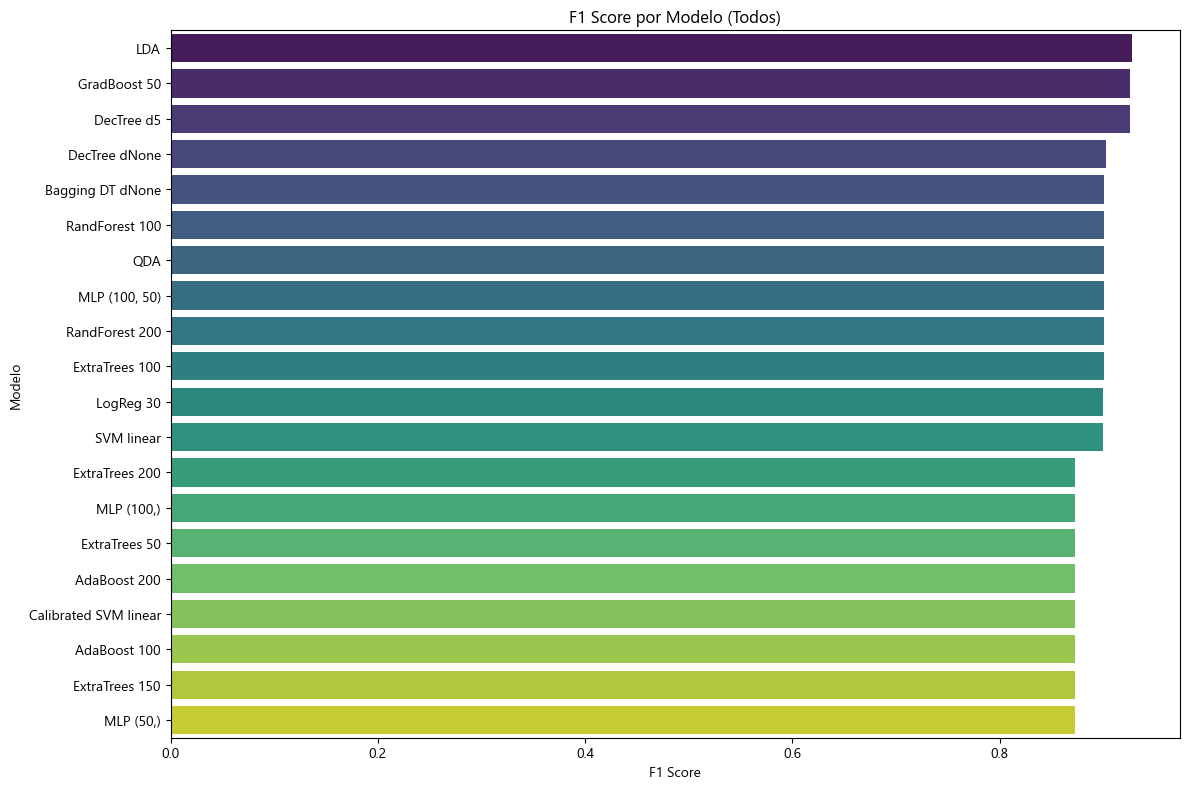

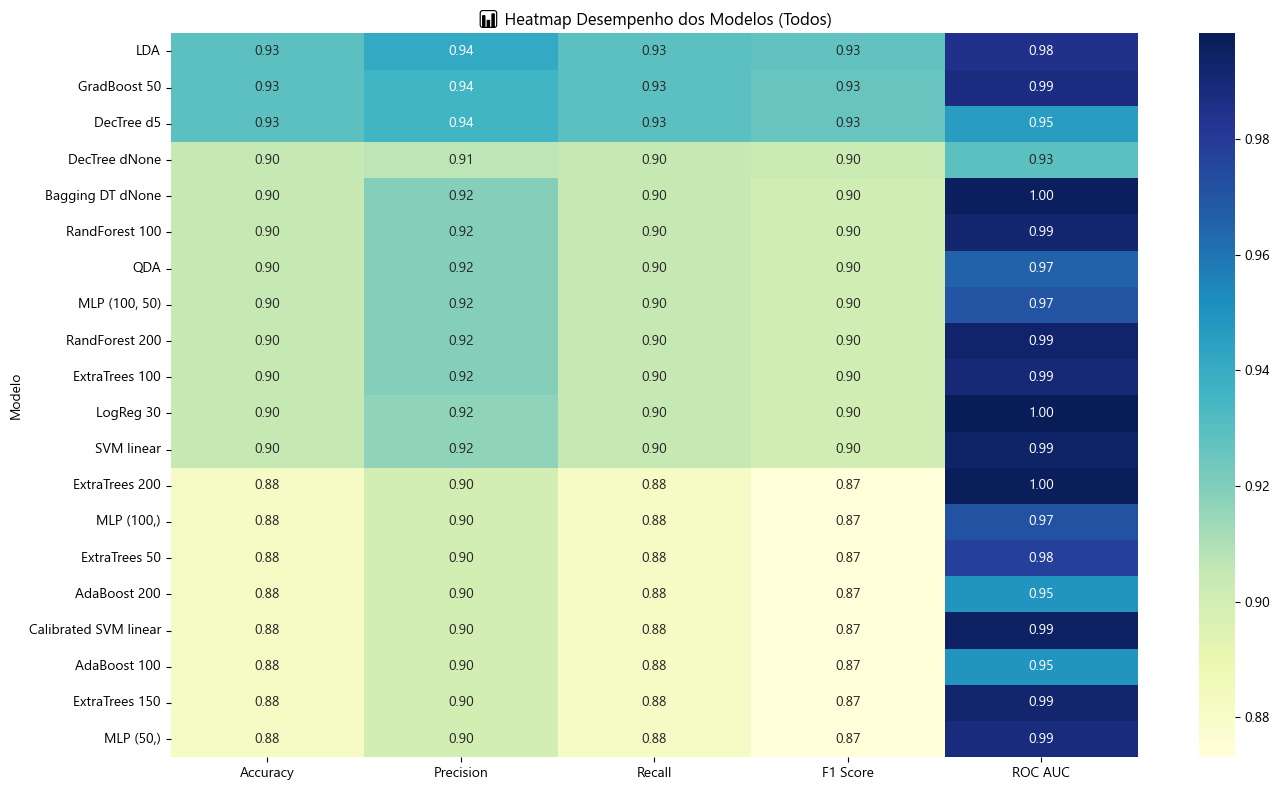

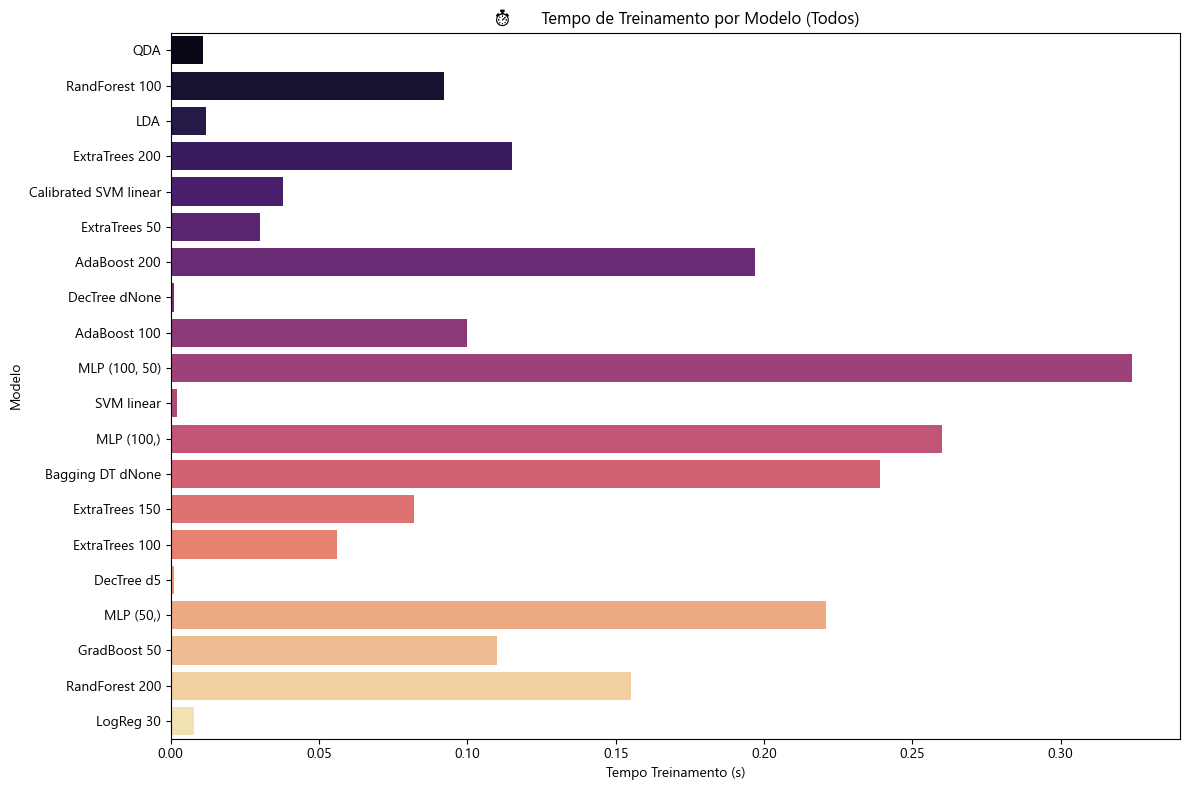

In [ ]:
#📋 Comparação visual entre modelos com base em métricas de classificação

def exibir_metricas(df_resultados, df_tempos):
    # Barplot - F1 Score
    plt.figure(figsize=(12, max(6, len(df_resultados) * 0.4)))
    sns.barplot(data=df_resultados, x='F1 Score', y='Modelo', hue='Modelo', palette='viridis', legend=False)
    plt.title('F1 Score por Modelo (Todos)')
    plt.tight_layout()
    plt.show()

    # Heatmap - Todas as métricas
    plt.figure(figsize=(14, max(6, len(df_resultados) * 0.4)))
    heatmap_data = df_resultados.drop(columns='Modelo').set_index(df_resultados['Modelo']).astype(float)
    sns.heatmap(heatmap_data, annot=True, cmap='YlGnBu', fmt='.2f')
    plt.title('📊 Heatmap Desempenho dos Modelos (Todos)')
    plt.rcParams['font.family'] = 'Segoe UI Emoji'
    plt.tight_layout()
    plt.show()

    # Tempo de treinamento
    plt.figure(figsize=(12, max(6, len(df_tempos) * 0.4)))
    sns.barplot(data=df_tempos, x='Tempo Treinamento (s)', y='Modelo', hue='Modelo', palette='magma', legend=False)
    plt.title('⏱️ Tempo de Treinamento por Modelo (Todos)')
    plt.rcParams['font.family'] = 'Segoe UI Emoji'
    plt.tight_layout()
    plt.show()

exibir_metricas(df_resultados, df_tempos)

🏆 Verificação e atualização dos 5 melhores modelos

Esta célula mantém um histórico dos 5 modelos com melhor desempenho com base na métrica F1 Score. Se já existir um arquivo melhores_modelos.csv, ele é carregado e combinado com os resultados atuais. A lista combinada é então ordenada, duplicatas são removidas e os 5 melhores modelos únicos são selecionados. Por fim, a nova lista é salva no mesmo arquivo CSV e os dados de tempo de treinamento são cruzados para esses modelos selecionados, preparando os resultados para visualização futura.

In [ ]:
# 🏆 Verificação e atualização dos 5 melhores modelos

caminho_csv = 'melhores_modelos.csv'
if os.path.exists(caminho_csv):
    melhores_anteriores = pd.read_csv(caminho_csv)
    combinados = pd.concat([melhores_anteriores, atual_resultados], ignore_index=True)
    combinados = combinados.sort_values(by='F1 Score', ascending=False).drop_duplicates('Modelo').head(5)
else:
    combinados = atual_resultados.head(5)

# Salvar top 5 atualizados
combinados.to_csv(caminho_csv, index=False)

# 3. Cria a pasta para salvar os modelos (se não existir)
os.makedirs("assets"modelos_salvos", exist_ok=True)

# 4. Salva somente os modelos que estão no top 5
modelos_treinados = {}
y_preds = {}
tempos = []

# Cria um set com os nomes dos top 5 para facilitar a verificação
top5_modelos = set(combinados['Modelo'])

for nome, modelo in modelos:
    if nome in top5_modelos:
        nome_arquivo = f"modelos_salvos/{nome.replace(' ', '_')}.pkl"
        joblib.dump(modelo, nome_arquivo)
        print(f"Modelo salvo em: {nome_arquivo}")

        modelos_treinados[nome] = modelo
        y_preds[nome] = y_pred  # Supondo que y_pred esteja atualizado para esse modelo
        tempos.append({'Modelo': nome, 'Tempo Treinamento (s)': round(duracao, 3)})

# Gerar top 5 resultados e tempos atualizados
top5_resultados = combinados 
top5_tempos = df_tempos.merge(top5_resultados[['Modelo']], on='Modelo')
top5_tempos['Modelo'] = pd.Categorical(top5_tempos['Modelo'], categories=top5_resultados['Modelo'], ordered=True)

Modelo salvo em: modelos_salvos/Calibrated_SVM_linear.pkl
Modelo salvo em: modelos_salvos/DecTree_d5.pkl


📊 Visualização dos 5 melhores modelos

Esta célula gera gráficos para comparar visualmente o desempenho dos 5 melhores modelos selecionados. São exibidos:

- Um gráfico de barras do F1 Score para os top 5 modelos, facilitando a comparação direta de desempenho.
- Um heatmap com todas as métricas de avaliação para esses modelos, mostrando detalhes de performance de forma clara.
- Um gráfico de barras com o tempo de treinamento de cada modelo, para analisar o custo computacional associado a cada um.

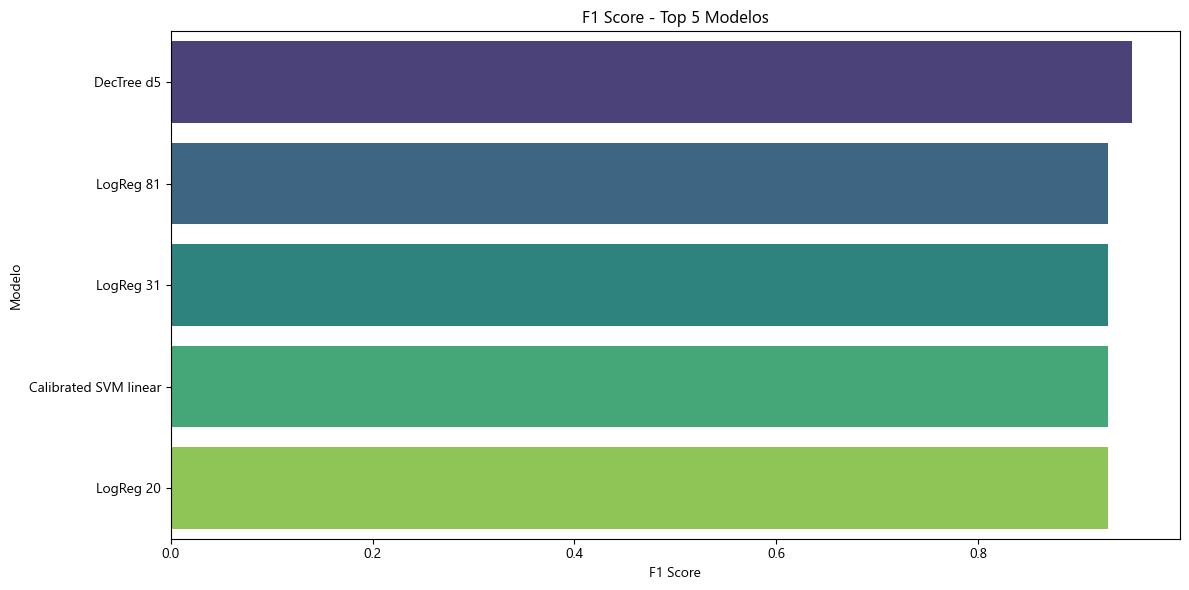

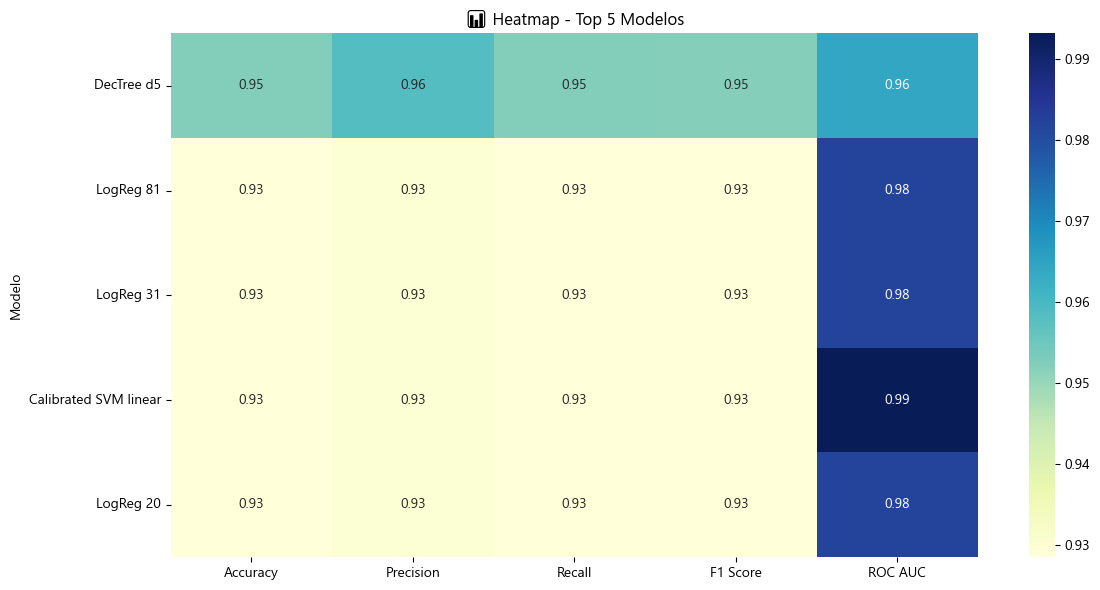

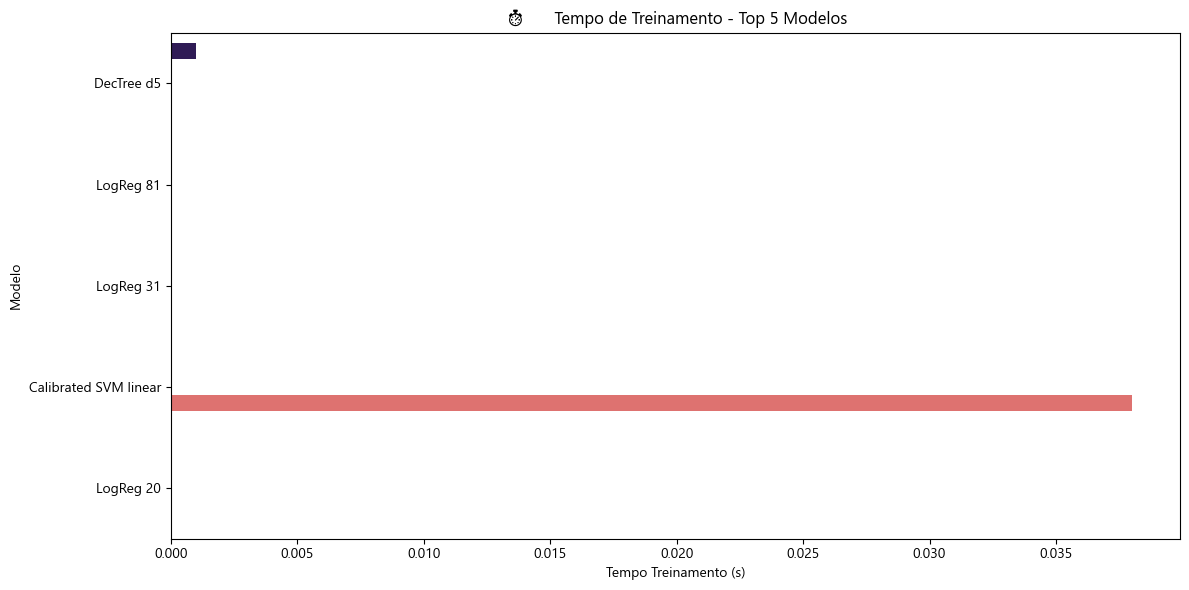

In [ ]:
#📊 Visualização dos 5 melhores modelos

# F1 Score dos top 5 modelos
plt.figure(figsize=(12, 6))
sns.barplot(data=top5_resultados, x='F1 Score', y='Modelo', hue='Modelo', palette='viridis', legend=False)
plt.title('F1 Score - Top 5 Modelos')
plt.tight_layout()
plt.show()

# Heatmap dos top 5 modelos
plt.figure(figsize=(12, 6))
sns.heatmap(top5_resultados.drop(columns='Modelo').set_index(top5_resultados['Modelo']).astype(float),annot=True,cmap='YlGnBu',fmt='.2f')
plt.title('📊 Heatmap - Top 5 Modelos')
plt.rcParams['font.family'] = 'Segoe UI Emoji'
plt.tight_layout()
plt.show()

# Gráfico de tempo dos top 5 modelos
plt.figure(figsize=(12, 6))
sns.barplot(data=top5_tempos, x='Tempo Treinamento (s)', y='Modelo', hue='Modelo', palette='magma', legend=False)
plt.title('⏱️ Tempo de Treinamento - Top 5 Modelos')
plt.rcParams['font.family'] = 'Segoe UI Emoji'
plt.tight_layout()
plt.show()

📑 Apresentação detalhada de métricas preditivas para cada algoritmo

Esta célula imprime, para cada modelo testado:

- A acurácia média da validação cruzada, que fornece uma estimativa mais robusta do desempenho geral, suavizando variações entre divisões dos dados;
- O relatório de classificação (classification_report), que mostra métricas específicas por classe (precisão, recall, f1-score), possibilitando uma avaliação mais granular da performance;
- A matriz de confusão, que evidencia os acertos e erros de classificação por categoria, sendo crucial para entender onde os modelos estão confundindo as culturas agrícolas.

Essa análise detalhada é essencial para identificar não apenas qual modelo tem melhor desempenho geral, mas também quais estão mais equilibrados entre as classes e quais podem estar cometendo erros sistemáticos.


🔍 Avaliando modelo: DecTree d5
✅ Acurácia: 0.9048
✅ Precisão: 0.9167
✅ Revocação: 0.9048
✅ F1-Score: 0.9000

📄 Relatório de Classificação:
              precision    recall  f1-score   support

       Alpha       1.00      0.71      0.83        14
        Beta       0.88      1.00      0.93        14
        Gama       0.88      1.00      0.93        14

    accuracy                           0.90        42
   macro avg       0.92      0.90      0.90        42
weighted avg       0.92      0.90      0.90        42



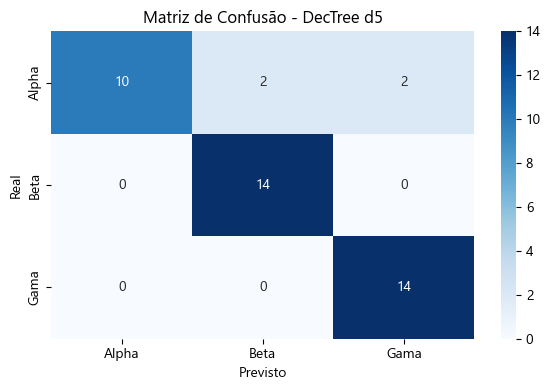


🔍 Avaliando modelo: LogReg 81
❌ Modelo 'LogReg 81' não foi treinado nesta execução e também não foi encontrado em disco.

🔍 Avaliando modelo: LogReg 31
❌ Modelo 'LogReg 31' não foi treinado nesta execução e também não foi encontrado em disco.

🔍 Avaliando modelo: Calibrated SVM linear
✅ Acurácia: 0.9048
✅ Precisão: 0.9167
✅ Revocação: 0.9048
✅ F1-Score: 0.9000

📄 Relatório de Classificação:
              precision    recall  f1-score   support

       Alpha       1.00      0.71      0.83        14
        Beta       0.88      1.00      0.93        14
        Gama       0.88      1.00      0.93        14

    accuracy                           0.90        42
   macro avg       0.92      0.90      0.90        42
weighted avg       0.92      0.90      0.90        42



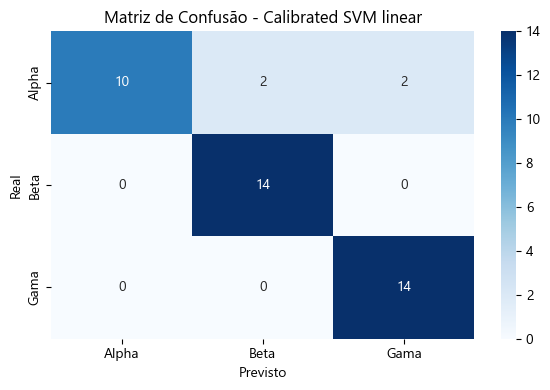


🔍 Avaliando modelo: LogReg 20
❌ Modelo 'LogReg 20' não foi treinado nesta execução e também não foi encontrado em disco.


In [ ]:
#📑 Apresentação detalhada de métricas preditivas para cada algoritmo

for nome in top5_resultados['Modelo']:
    print(f"\n🔍 Avaliando modelo: {nome}")

    # Tenta obter o modelo: da memória ou do disco
    if nome in modelos_treinados:
        modelo = modelos_treinados[nome]
    else:
        try:
            caminho_modelo = f"modelos_salvos/{nome}.pkl"
            modelo = joblib.load(caminho_modelo)
            print(f"📂 Modelo '{nome}' carregado do disco com sucesso.")
        except FileNotFoundError:
            print(f"❌ Modelo '{nome}' não foi treinado nesta execução e também não foi encontrado em disco.")
            continue  # neste caso, não tem como avaliar

    # Tenta obter as previsões
    if nome in y_preds:
        y_pred = y_preds[nome]
    else:
        y_pred = modelo.predict(X_test)
        y_preds[nome] = y_pred  # salva para reutilização, se necessário
        
        
    # Avaliação
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred, average='weighted', zero_division=0)
    rec = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')

    print(f"✅ Acurácia: {acc:.4f}")
    print(f"✅ Precisão: {prec:.4f}")
    print(f"✅ Revocação: {rec:.4f}")
    print(f"✅ F1-Score: {f1:.4f}")

    # Relatório de classificação
    print("\n📄 Relatório de Classificação:")
    print(classification_report(y_test, y_pred, target_names=le.classes_, zero_division=0))

    # Matriz de confusão
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=le.classes_, yticklabels=le.classes_)
    plt.title(f"Matriz de Confusão - {nome}")
    plt.xlabel("Previsto")
    plt.ylabel("Real")
    plt.tight_layout()
    plt.show()

📊 Definição dos grids de hiperparâmetros para otimização dos modelos selecionados

Esta célula apresenta os parâmetros a serem explorados no processo de busca em grid (GridSearchCV) para cada classificador, permitindo a escolha automática dos melhores hiperparâmetros com base na métrica de avaliação definida.

Para cada modelo, foram selecionados hiperparâmetros relevantes que influenciam diretamente o desempenho e a capacidade de generalização, como:

- **LogisticRegression:** penalização, força da regularização (C), solver e número máximo de iterações;
- **DecisionTreeClassifier:** profundidade máxima, tamanho mínimo para divisão e número mínimo de amostras por folha;
- **RandomForestClassifier, ExtraTreesClassifier:** número de árvores, profundidade, amostragem e parâmetros de divisão;
- **GradientBoostingClassifier e AdaBoostClassifier:** número de estimadores, taxa de aprendizado, profundidade e subsampling;
- **SVC:** tipos de kernel, parâmetro de regularização (C), coeficiente gamma e grau do polinômio;
- **KNeighborsClassifier:** número de vizinhos, esquema de ponderação e métrica de distância;
- **Modelos com poucos hiperparâmetros (GaussianNB, LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis):** parâmetros básicos para regularização e solver;
- **MLPClassifier:** arquitetura da rede, função de ativação, solver, parâmetro de regularização (alpha), taxa de aprendizado e número máximo de iterações;
- **BaggingClassifier:** número de estimadores, proporções de amostras e características usadas, tipo de bootstrap e profundidade da árvore base;
- **CalibratedClassifierCV:** método de calibração e folds da validação cruzada.

Essa definição é fundamental para a aplicação da metodologia de otimização de hiperparâmetros, garantindo uma busca ampla e eficiente para identificar a melhor configuração para cada algoritmo no contexto da classificação dos dados.

In [ ]:
# Definição dos grids de hiperparâmetros para alguns modelos selecionados como exemplo
param_grids = {
    'LogisticRegression': {
        'C': [0.01, 0.1, 1, 10],
        'penalty': ['l2'],
        'solver': ['lbfgs', 'liblinear'],
        'max_iter': [500, 1000, 2000]
    },

    'DecisionTreeClassifier': {
        'max_depth': [None, 3, 5, 10, 15],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4]
    },

    'RandomForestClassifier': {
        'n_estimators': [50, 100, 150, 200],
        'max_depth': [None, 3, 5, 10],
        'min_samples_split': [2, 5],
        'min_samples_leaf': [1, 2],
        'bootstrap': [True, False]
    },

    'GradientBoostingClassifier': {
        'n_estimators': [50, 100, 150, 200],
        'learning_rate': [0.01, 0.1, 0.2],
        'max_depth': [3, 5, 10],
        'subsample': [0.6, 0.8, 1.0]
    },

    'ExtraTreesClassifier': {
        'n_estimators': [50, 100, 150, 200],
        'max_depth': [None, 3, 5, 10],
        'min_samples_split': [2, 5],
        'min_samples_leaf': [1, 2],
        'bootstrap': [True, False]
    },

    'AdaBoostClassifier': {
        'n_estimators': [50, 100, 150, 200],
        'learning_rate': [0.01, 0.1, 1.0]
    },

    'SVC': {
        'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
        'C': [0.1, 1, 10],
        'gamma': ['scale', 'auto'],
        'degree': [3, 4, 5]  # só usado para poly
    },

    'KNeighborsClassifier': {
        'n_neighbors': [3, 5, 7, 10, 15],
        'weights': ['uniform', 'distance'],
        'metric': ['euclidean', 'manhattan']
    },

    'GaussianNB': {
        # Quase não tem hiperparâmetros, fica vazio
    },

    'LinearDiscriminantAnalysis': {
        'solver': ['svd', 'lsqr', 'eigen'],
        'shrinkage': [None, 'auto']
    },

    'QuadraticDiscriminantAnalysis': {
        'reg_param': [0.0, 0.1, 0.5, 1.0]
    },

    'MLPClassifier': {
        'hidden_layer_sizes': [(50,), (100,), (50, 50), (100, 50)],
        'activation': ['relu', 'tanh', 'logistic'],
        'solver': ['adam', 'sgd'],
        'alpha': [0.0001, 0.001, 0.01],
        'learning_rate': ['constant', 'adaptive'],
        'max_iter': [500, 1000, 2000]
    },

    'BaggingClassifier': {
        'n_estimators': [10, 50, 100],
        'max_samples': [0.5, 0.8, 1.0],
        'max_features': [0.5, 0.8, 1.0],
        'bootstrap': [True, False],
        'bootstrap_features': [True, False],
        # estimator é DecisionTree, ajuste para max_depth dele
        'base_estimator__max_depth': [None, 3, 5, 10]
    },

    'CalibratedClassifierCV': {
        'method': ['sigmoid', 'isotonic'],
        'cv': [3, 5, 10]
    }
}

📈 Visualização da distribuição das classes no conjunto de teste

Esta célula gera uma tabela que mostra a contagem de amostras para cada classe no conjunto de teste, após a inversão da codificação realizada pelo label encoder (le).

- A transformação inversa permite visualizar as classes em seus nomes originais;
- O uso de `value_counts()` calcula a frequência de cada classe no conjunto de teste;
- O resultado é organizado em um DataFrame, com as classes e suas respectivas contagens;
- A ordenação decrescente destaca as classes mais frequentes, facilitando a análise do balanceamento do dataset.

Essa visualização é importante para entender a representatividade de cada classe na fase de teste e para verificar possíveis desequilíbrios que possam afetar a avaliação dos modelos.

In [ ]:
#📈 Visualização da distribuição das classes no conjunto de teste

pd.DataFrame(le.inverse_transform(y_test)) \
    .value_counts() \
    .reset_index(name='count') \
    .rename(columns={'index': 'label'}) \
    .sort_values(by='count', ascending=False)

,0,count
0,Alpha,14
1,Beta,14
2,Gama,14


⚙️ Otimização de hiperparâmetros com GridSearchCV para os modelos selecionados

Esta célula realiza o ajuste dos hiperparâmetros dos modelos por meio de busca em grade com validação cruzada, buscando a melhor combinação para maximizar a métrica F1 ponderada. Para cada modelo disponível com grid definido, a otimização é executada, considerando parâmetros específicos quando necessário, como no caso do BaggingClassifier. O tempo de execução do processo é registrado para análise do custo computacional. Após encontrar a melhor configuração, o modelo otimizado é avaliado no conjunto de teste por métricas como acurácia, precisão, recall, F1-score e ROC AUC (quando aplicável). Os resultados, modelos ajustados e tempos são armazenados para comparação. Modelos sem grids definidos são automaticamente ignorados, mantendo o foco apenas nos que permitem otimização. Este procedimento é essencial para garantir o melhor desempenho possível de cada classificador no problema em questão.

In [ ]:
#📈 Otimização de hiperparâmetros com GridSearchCV para os modelos selecionados

modelos_otimizados = []
resultados_otimizados = []
tempos_otimizados = []

for nome, modelo in modelos:
    print(f"\nIniciando otimização para: {nome}")
    modelo_classe = modelo.__class__.__name__
    
    if modelo_classe in param_grids:
        param_grid = param_grids[modelo_classe].copy()

        # Ajuste para BaggingClassifier
        if modelo_classe == 'BaggingClassifier':
            param_grid = {k.replace('base_estimator__', 'estimator__'): v for k, v in param_grid.items()}
        
        # Ajuste para CalibratedClassifierCV — somente se for necessário parametrizar o base_estimator
        if modelo_classe == 'CalibratedClassifierCV':
            continue  # ou ajuste conforme sua lógica

        grid_search = GridSearchCV(
            estimator=modelo,
            param_grid=param_grid,
            scoring='f1_weighted',
            cv=cv,
            n_jobs=-1,
            verbose=2
        )

        inicio = time.time()
        grid_search.fit(X_train, y_train)
        fim = time.time()

        melhor_modelo = grid_search.best_estimator_
        duracao = fim - inicio

        print(f"Melhores parâmetros para {nome}: {grid_search.best_params_}")
        print(f"Tempo otimização: {duracao:.2f} segundos")
        
        # Avaliação no conjunto de teste
        y_pred = melhor_modelo.predict(X_test)

        try:
            y_proba = melhor_modelo.predict_proba(X_test)
            if len(set(y_enc)) == 2:
                auc = roc_auc_score(y_test, y_proba[:, 1])
            else:
                auc = roc_auc_score(y_test, y_proba, multi_class='ovr')
        except Exception:
            auc = None

        resultados_otimizados.append({
            'Modelo': nome + " (Otimizado)",
            'Accuracy': accuracy_score(y_test, y_pred),
            'Precision': precision_score(y_test, y_pred, average='weighted', zero_division=0),
            'Recall': recall_score(y_test, y_pred, average='weighted'),
            'F1 Score': f1_score(y_test, y_pred, average='weighted'),
            'ROC AUC': auc
        })

        modelos_otimizados.append((nome, melhor_modelo))  # Tupla correta
        tempos_otimizados.append({'Modelo': nome + " (Otimizado)", 'Tempo Otimização + Treino (s)': round(duracao, 3)})

    else:
        print(f"Sem grid definido para {nome} (tipo {modelo_classe}), pulando otimização.")

✅ Visualização dos modelos otimizados

Nesta célula, são construídos DataFrames com os resultados das métricas de desempenho e os tempos de treinamento dos modelos otimizados. Os resultados são ordenados pelo F1 Score em ordem decrescente para destacar os melhores desempenhos. A função `exibir_metricas` é então chamada para apresentar essas informações de forma clara e organizada, facilitando a análise comparativa entre os modelos após a otimização dos hiperparâmetros. Essa visualização é fundamental para identificar quais algoritmos otimizados alcançaram o melhor equilíbrio entre eficiência e eficácia na classificação.

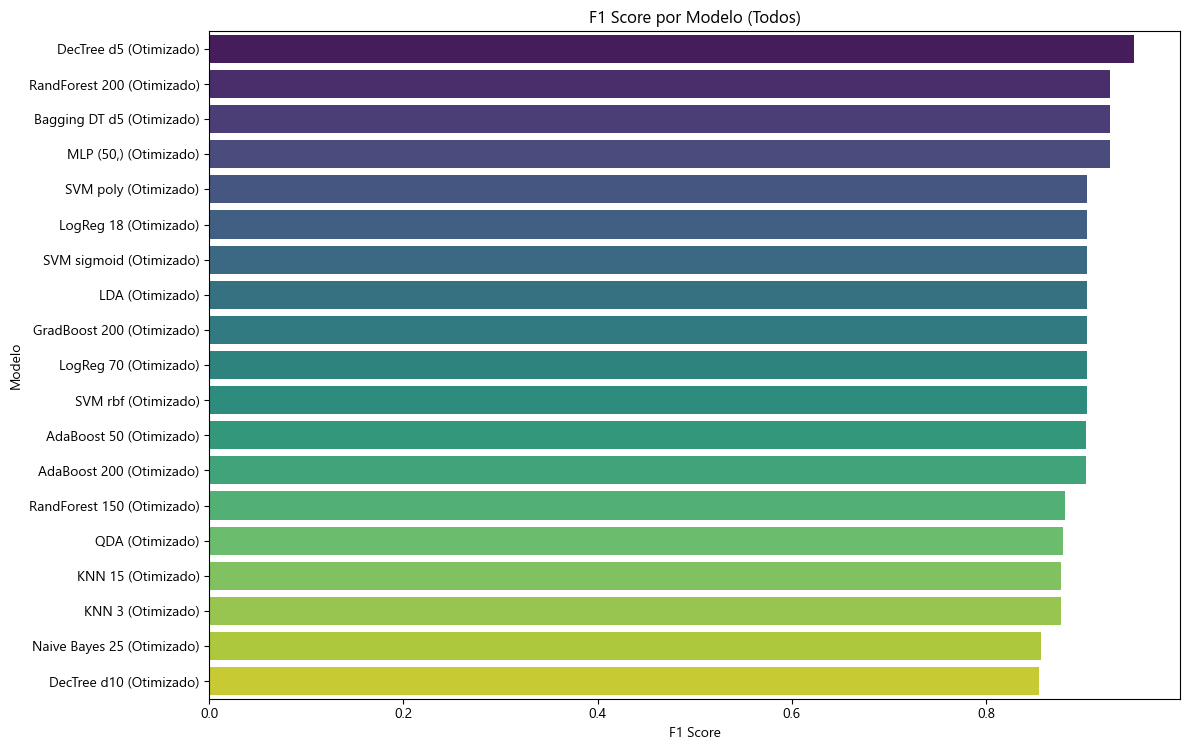

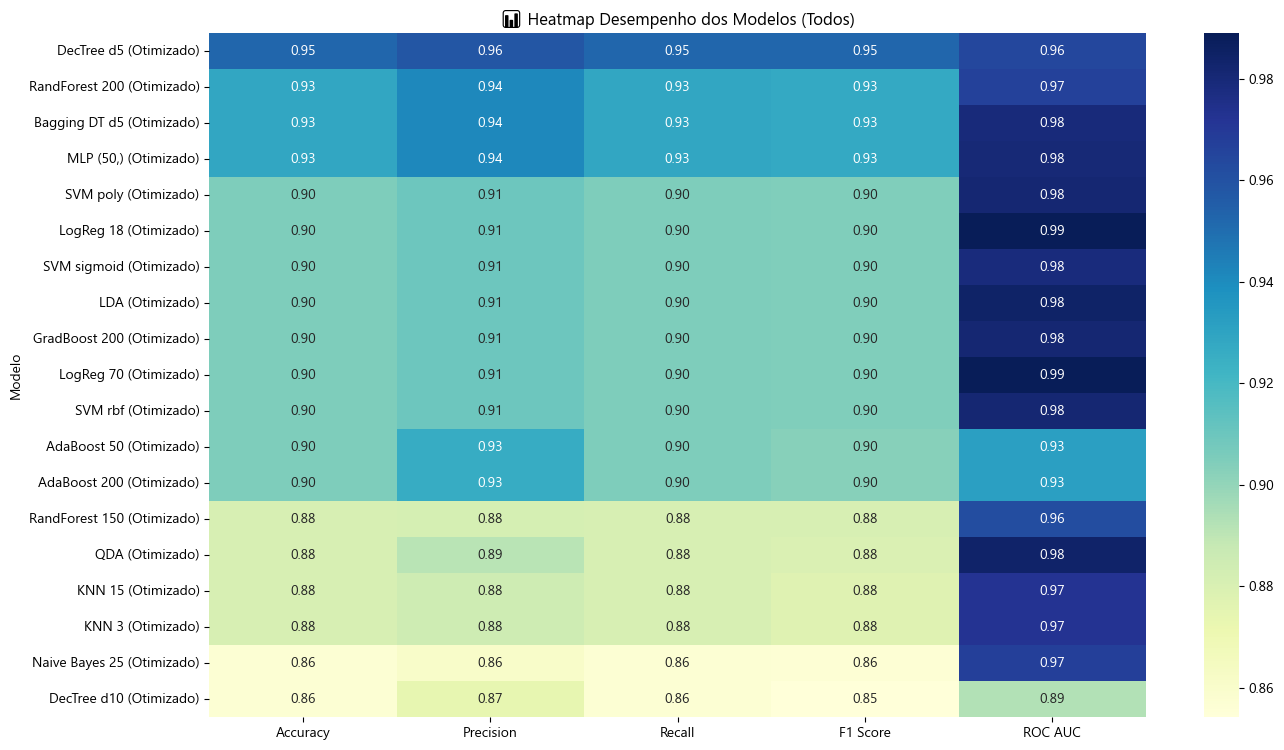

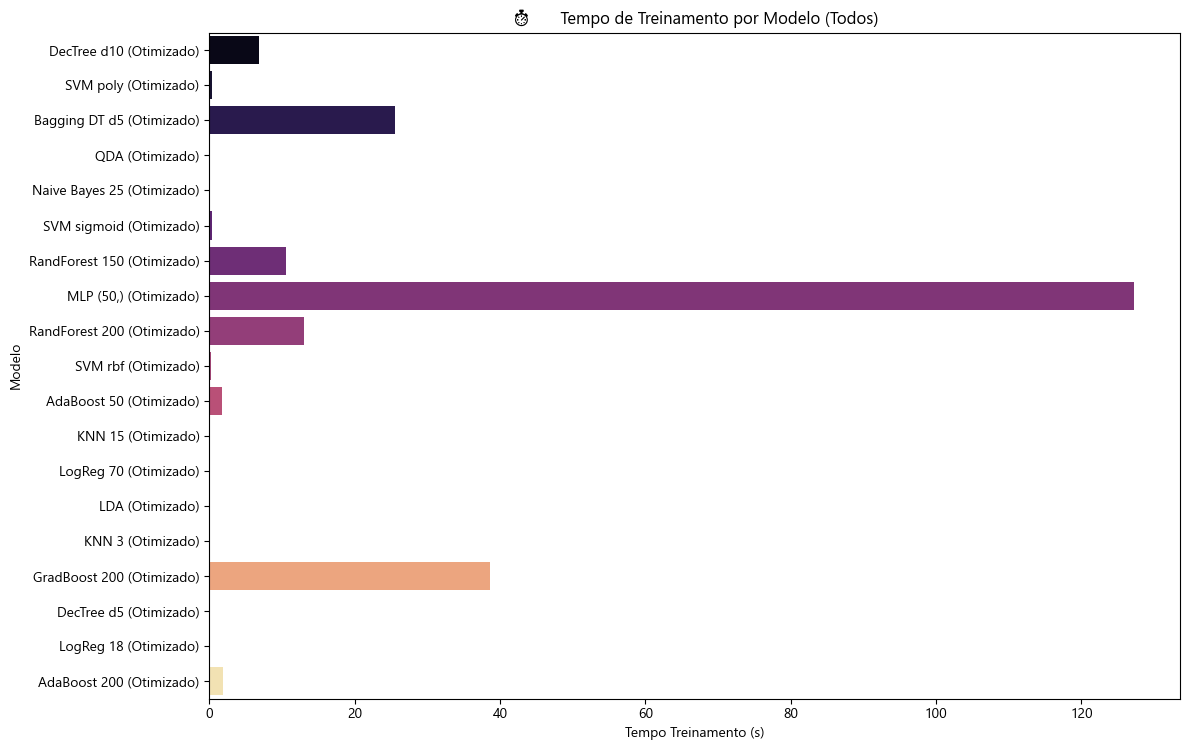

In [ ]:
    # ✅ Visualização dos modelos otimizados
    
# Construção dos DataFrames
df_resultados_otimizados = pd.DataFrame(resultados_otimizados).sort_values(by='F1 Score', ascending=False)
df_tempos_otimizados = pd.DataFrame(tempos_otimizados).rename(columns={"Tempo Otimização + Treino (s)": "Tempo Treinamento (s)"})

# Visualização
exibir_metricas(df_resultados_otimizados, df_tempos_otimizados)

🔁 Reavaliação dos modelos otimizados com os melhores hiperparâmetros encontrados

Esta célula executa o re-treinamento e avaliação dos modelos já otimizados utilizando os melhores hiperparâmetros encontrados anteriormente. Cada modelo é ajustado novamente aos dados de treino e avaliado no conjunto de teste, medindo as métricas de acurácia, precisão, recall, F1-score e ROC AUC (quando aplicável). O tempo gasto para treinar e prever também é registrado para análise do custo computacional. Os resultados, os modelos treinados e as previsões são armazenados para uso posterior. Esse processo é importante para validar o desempenho dos modelos já otimizados e garantir a consistência dos resultados.

In [ ]:
#🔁 Reavaliação dos modelos otimizados com os melhores hiperparâmetros encontrados

resultados_otimizados = []
tempos_otimizados = []
modelos_otimizados_treinados = {}
y_preds_otimizados = {}

for nome, modelo_otimizado in modelos_otimizados:
    print(f"🔧 Reavaliando: {nome}")
    inicio = time.time()

    modelo_otimizado.fit(X_train, y_train)
    y_pred = modelo_otimizado.predict(X_test)

    fim = time.time()
    duracao = fim - inicio

    try:
        y_proba = modelo_otimizado.predict_proba(X_test)
        if len(set(y)) == 2:
            auc = roc_auc_score(y_test, y_proba[:, 1])
        else:
            auc = roc_auc_score(y_test, y_proba, multi_class='ovr')
    except:
        auc = None

    resultados_otimizados.append({
        'Modelo': nome,
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred, average='weighted', zero_division=0),
        'Recall': recall_score(y_test, y_pred, average='weighted'),
        'F1 Score': f1_score(y_test, y_pred, average='weighted'),
        'ROC AUC': auc
    })

    modelos_otimizados_treinados[nome] = modelo_otimizado
    y_preds_otimizados[nome] = y_pred
    tempos_otimizados.append({'Modelo': nome, 'Tempo Treinamento (s)': round(duracao, 3)})

🔧 Reavaliando: DecTree d10
🔧 Reavaliando: SVM poly
🔧 Reavaliando: Bagging DT d5
🔧 Reavaliando: QDA
🔧 Reavaliando: Naive Bayes 25
🔧 Reavaliando: SVM sigmoid
🔧 Reavaliando: RandForest 150
🔧 Reavaliando: MLP (50,)
🔧 Reavaliando: RandForest 200
🔧 Reavaliando: SVM rbf
🔧 Reavaliando: AdaBoost 50
🔧 Reavaliando: KNN 15
🔧 Reavaliando: LogReg 70
🔧 Reavaliando: LDA
🔧 Reavaliando: KNN 3
🔧 Reavaliando: GradBoost 200
🔧 Reavaliando: DecTree d5
🔧 Reavaliando: LogReg 18
🔧 Reavaliando: AdaBoost 200


📊 Organização dos resultados otimizados

Nesta célula, os resultados das métricas de desempenho e os tempos de treinamento dos modelos otimizados são organizados em DataFrames, que são ordenados pelo F1 Score de forma decrescente para destacar os modelos com melhor performance. Em seguida, a função `exibir_metricas` é utilizada para apresentar essas informações de forma visual e intuitiva, facilitando a comparação e análise dos modelos otimizados. Essa organização permite uma avaliação clara e objetiva do impacto da otimização dos hiperparâmetros sobre o desempenho dos classificadores.

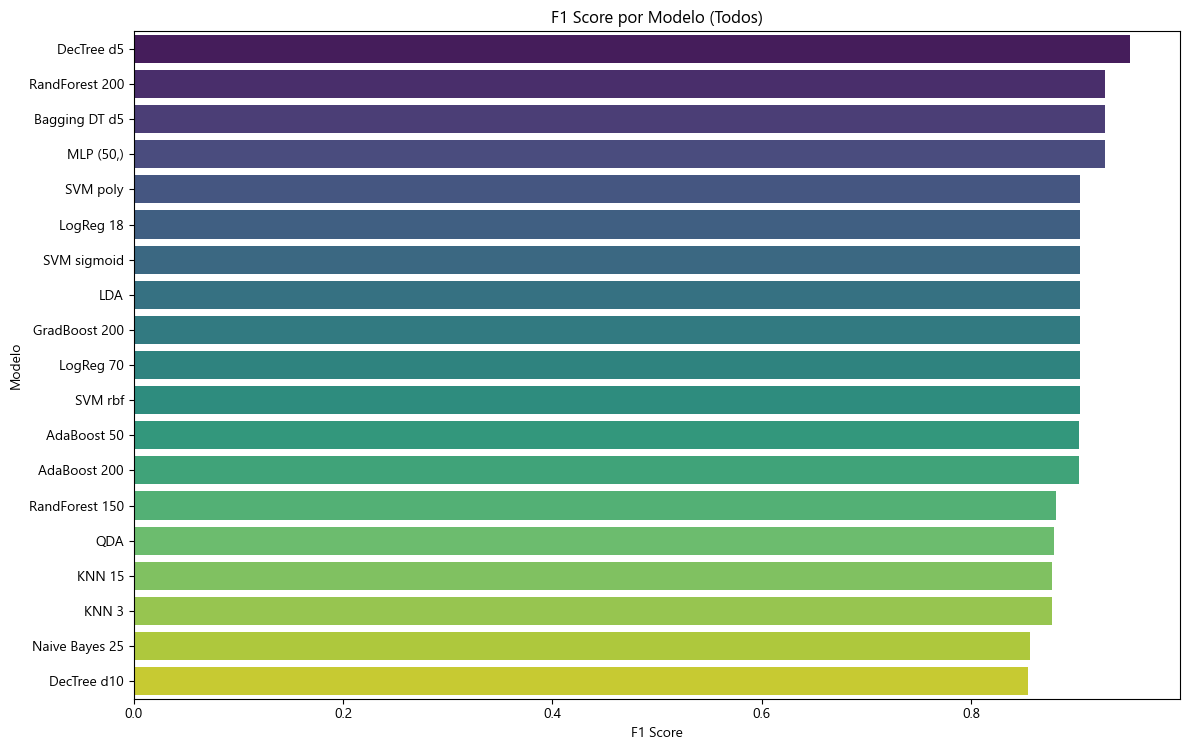

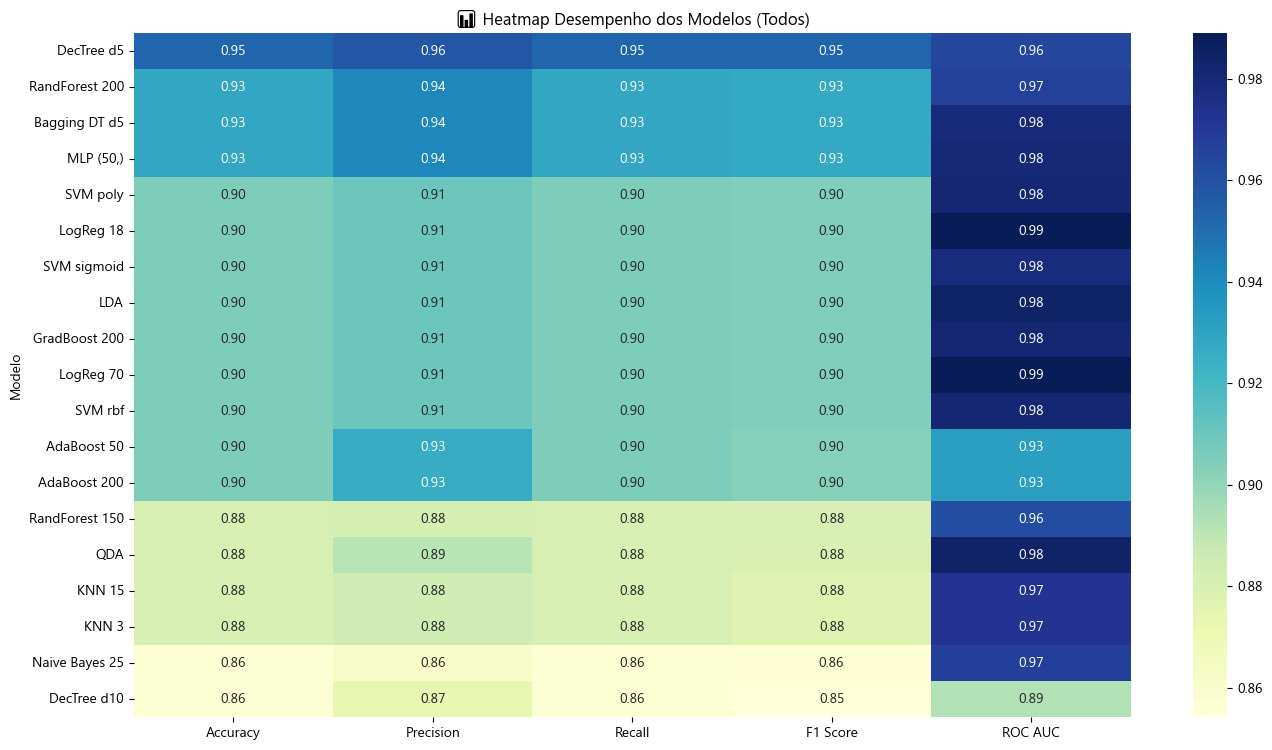

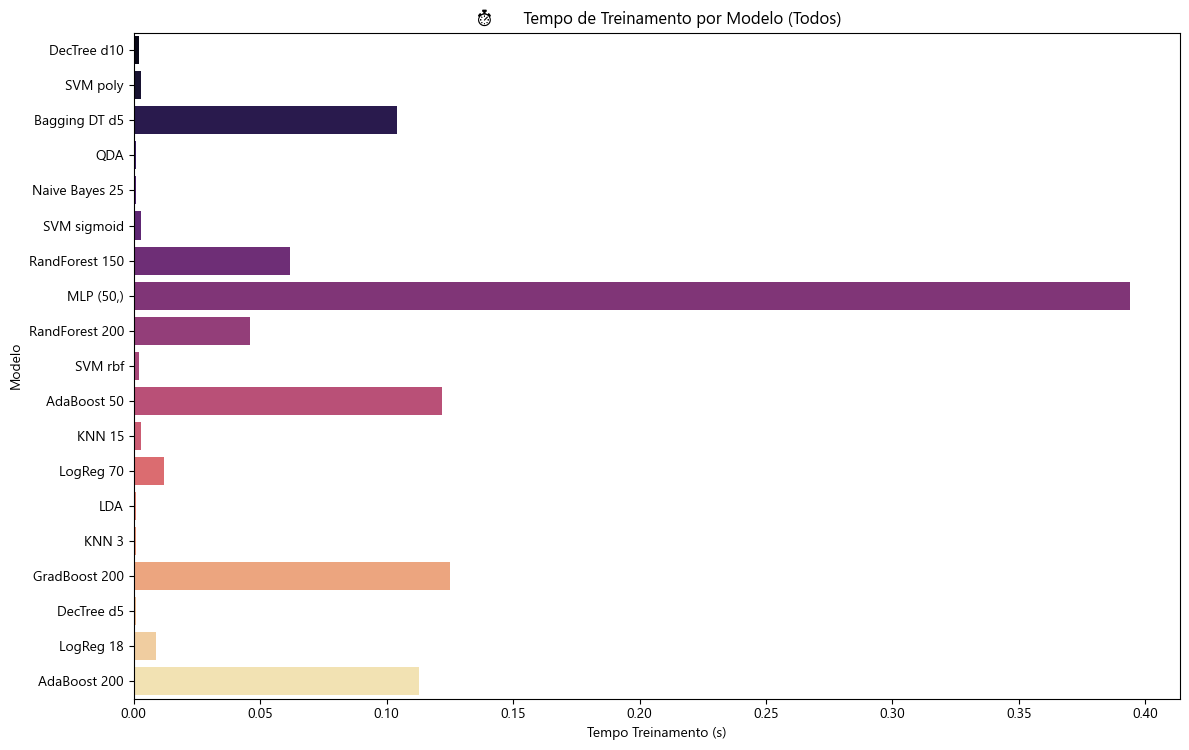

In [ ]:
#📊 Organização dos resultados otimizados

df_resultados_otimizados = pd.DataFrame(resultados_otimizados).sort_values(by='F1 Score', ascending=False)
df_tempos_otimizados = pd.DataFrame(tempos_otimizados)

# Visualizações
exibir_metricas(df_resultados_otimizados, df_tempos_otimizados)

🏆 Atualização do top 5 com os modelos otimizados

Esta célula realiza a atualização do ranking dos cinco melhores modelos considerando os resultados atuais de otimização. Caso exista um arquivo CSV com os melhores modelos anteriores, ele é carregado e combinado com os novos resultados, garantindo a manutenção dos melhores desempenhos sem duplicatas. O ranking é então reordenado pelo F1 Score e os top 5 são selecionados para salvamento. Os modelos correspondentes a essas cinco melhores configurações são armazenados localmente em formato `.pkl`, garantindo a persistência dos classificadores otimizados para uso futuro. Essa etapa é essencial para consolidar os melhores resultados obtidos e facilitar a reutilização dos modelos.

In [ ]:
#🏆 Atualização do top 5 com os otimizados

caminho_csv = 'melhores_modelos_otimizados.csv'
if os.path.exists(caminho_csv):
    melhores_anteriores = pd.read_csv(caminho_csv)
    combinados = pd.concat([melhores_anteriores, df_resultados_otimizados], ignore_index=True)
    combinados = combinados.sort_values(by='F1 Score', ascending=False).drop_duplicates('Modelo').head(5)
else:
    combinados = df_resultados_otimizados.head(5)

combinados.to_csv(caminho_csv, index=False)

# Salvar modelos otimizados top 5
os.makedirs("assets"modelos_otimizados_salvos", exist_ok=True)
top5_otimizados = set(combinados['Modelo'])

for nome, modelo in modelos_otimizados:
    if nome in top5_otimizados:
        caminho = f"modelos_otimizados_salvos/{nome.replace(' ', '_')}.pkl"
        joblib.dump(modelo, caminho)
        print(f"💾 Modelo otimizado salvo em: {caminho}")

💾 Modelo otimizado salvo em: modelos_otimizados_salvos/MLP_(50,).pkl
💾 Modelo otimizado salvo em: modelos_otimizados_salvos/DecTree_d5.pkl


📄 Avaliação detalhada dos top 5 modelos otimizados

Esta célula realiza uma avaliação completa dos cinco melhores modelos otimizados, apresentando métricas de desempenho e visualizações que facilitam a análise detalhada da performance de cada classificador. Para cada modelo, seja carregado da memória ou do disco, são exibidas as métricas principais — acurácia, precisão, recall e F1-Score — seguidas pelo relatório de classificação que detalha essas métricas por classe. Além disso, é gerada a matriz de confusão em forma de heatmap, permitindo identificar padrões de acertos e erros entre as classes. Essa avaliação detalhada é fundamental para compreender o comportamento dos modelos nos dados de teste e identificar pontos fortes e limitações de cada um.


🔍 Avaliando modelo otimizado: DecTree d5
✅ Acurácia: 0.9524
✅ Precisão: 0.9583
✅ Recall: 0.9524
✅ F1-Score: 0.9521

📄 Relatório de Classificação:
              precision    recall  f1-score   support

    Canadian       0.88      1.00      0.93        14
        Kama       1.00      0.86      0.92        14
        Rosa       1.00      1.00      1.00        14

    accuracy                           0.95        42
   macro avg       0.96      0.95      0.95        42
weighted avg       0.96      0.95      0.95        42



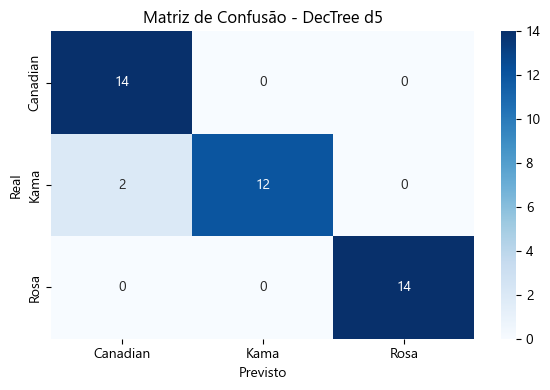


🔍 Avaliando modelo otimizado: DecTree d3
📂 Modelo 'DecTree d3' carregado do disco.
✅ Acurácia: 0.8095
✅ Precisão: 0.8241
✅ Recall: 0.8095
✅ F1-Score: 0.8093

📄 Relatório de Classificação:
              precision    recall  f1-score   support

    Canadian       0.72      0.93      0.81        14
        Kama       0.75      0.64      0.69        14
        Rosa       1.00      0.86      0.92        14

    accuracy                           0.81        42
   macro avg       0.82      0.81      0.81        42
weighted avg       0.82      0.81      0.81        42



c:\Users\lesas\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\base.py:442: InconsistentVersionWarning:

Trying to unpickle estimator DecisionTreeClassifier from version 1.6.1 when using version 1.7.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations



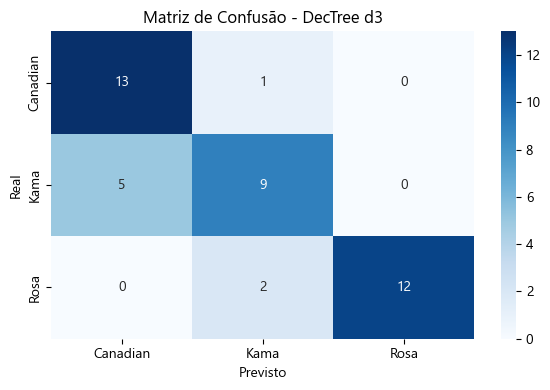


🔍 Avaliando modelo otimizado: Bagging DT d10
📂 Modelo 'Bagging DT d10' carregado do disco.
✅ Acurácia: 0.2619
✅ Precisão: 0.3333
✅ Recall: 0.2619
✅ F1-Score: 0.2933

📄 Relatório de Classificação:
              precision    recall  f1-score   support

    Canadian       0.00      0.00      0.00        14
        Kama       1.00      0.79      0.88        14
        Rosa       0.00      0.00      0.00        14

    accuracy                           0.26        42
   macro avg       0.33      0.26      0.29        42
weighted avg       0.33      0.26      0.29        42



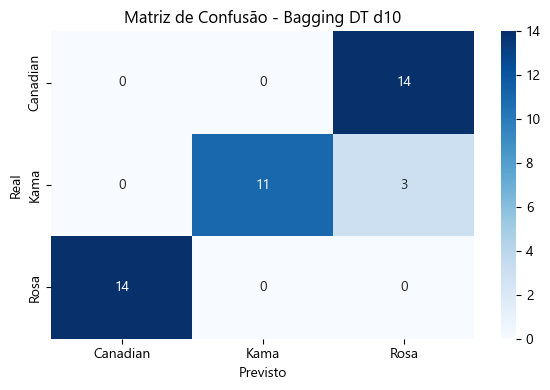


🔍 Avaliando modelo otimizado: GradBoost 150
📂 Modelo 'GradBoost 150' carregado do disco.
✅ Acurácia: 0.9286
✅ Precisão: 0.9412
✅ Recall: 0.9286
✅ F1-Score: 0.9277

📄 Relatório de Classificação:
              precision    recall  f1-score   support

    Canadian       0.82      1.00      0.90        14
        Kama       1.00      0.79      0.88        14
        Rosa       1.00      1.00      1.00        14

    accuracy                           0.93        42
   macro avg       0.94      0.93      0.93        42
weighted avg       0.94      0.93      0.93        42



c:\Users\lesas\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\base.py:442: InconsistentVersionWarning:

Trying to unpickle estimator DecisionTreeRegressor from version 1.6.1 when using version 1.7.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations

c:\Users\lesas\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\base.py:442: InconsistentVersionWarning:

Trying to unpickle estimator DummyClassifier from version 1.6.1 when using version 1.7.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations

c:\Users\lesas\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\base.py:442: InconsistentVersionWarning:

Trying to unpickle estimator GradientBoostingCl

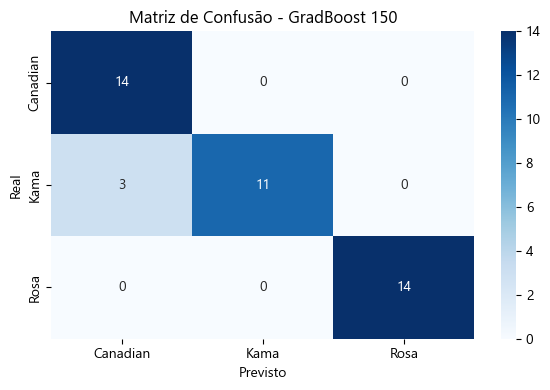


🔍 Avaliando modelo otimizado: MLP (50,)
✅ Acurácia: 0.9286
✅ Precisão: 0.9412
✅ Recall: 0.9286
✅ F1-Score: 0.9277

📄 Relatório de Classificação:
              precision    recall  f1-score   support

    Canadian       0.82      1.00      0.90        14
        Kama       1.00      0.79      0.88        14
        Rosa       1.00      1.00      1.00        14

    accuracy                           0.93        42
   macro avg       0.94      0.93      0.93        42
weighted avg       0.94      0.93      0.93        42



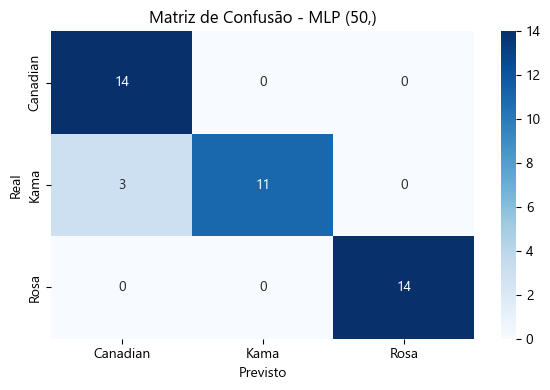

In [ ]:
#📄 Avaliação detalhada dos top 5 modelos otimizados

for nome in combinados['Modelo']:
    print(f"\n🔍 Avaliando modelo otimizado: {nome}")

    if nome in modelos_otimizados_treinados:
        modelo = modelos_otimizados_treinados[nome]
    else:
        caminho_modelo = f"modelos_otimizados_salvos/{nome.replace(' ', '_')}.pkl"
        modelo = joblib.load(caminho_modelo)
        print(f"📂 Modelo '{nome}' carregado do disco.")

    if nome in y_preds_otimizados:
        y_pred = y_preds_otimizados[nome]
    else:
        y_pred = modelo.predict(X_test)

    print(f"✅ Acurácia: {accuracy_score(y_test, y_pred):.4f}")
    print(f"✅ Precisão: {precision_score(y_test, y_pred, average='weighted', zero_division=0):.4f}")
    print(f"✅ Recall: {recall_score(y_test, y_pred, average='weighted'):.4f}")
    print(f"✅ F1-Score: {f1_score(y_test, y_pred, average='weighted'):.4f}")

    print("\n📄 Relatório de Classificação:")
    print(classification_report(y_test, y_pred, target_names=le.classes_, zero_division=0))

    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=le.classes_, yticklabels=le.classes_)
    plt.title(f"Matriz de Confusão - {nome}")
    plt.xlabel("Previsto")
    plt.ylabel("Real")
    plt.tight_layout()
    plt.show()

📊 Comparação dos modelos originais vs otimizados

Nesta célula, ajustamos os nomes dos modelos para permitir a comparação direta entre versões originais e otimizadas, removendo o sufixo " (Otimizado)" para criar uma chave comum. Em seguida, realizamos um merge dos DataFrames de resultados para alinhar as métricas lado a lado. Calculamos o ganho absoluto em cada métrica principal (acurácia, precisão, recall, F1 Score e ROC AUC) decorrente da otimização. Os ganhos são organizados e apresentados em uma tabela ordenada pelo maior aumento no F1 Score, facilitando a identificação dos modelos que mais se beneficiaram da otimização. Por fim, um gráfico de barras compara visualmente o F1 Score antes e depois da otimização, evidenciando os avanços obtidos em cada classificador.

Resumo dos ganhos após otimização:


,Modelo_base,Ganho_Accuracy,Ganho_Precision,Ganho_Recall,Ganho_F1 Score,Ganho_ROC AUC
18,SVM sigmoid,0.8810,0.8901,0.8810,0.8828,0.1207
10,RandForest 200,0.0476,0.0499,0.0476,0.0482,-0.0106
15,AdaBoost 200,0.0476,0.0648,0.0476,0.0464,0.0340
16,AdaBoost 50,0.0476,0.0648,0.0476,0.0464,0.0340
13,RandForest 150,0.0238,0.0209,0.0238,0.0244,-0.0162
8,"MLP (50,)",0.0238,0.0315,0.0238,0.0235,-0.0051
0,DecTree d5,0.0000,0.0000,0.0000,0.0000,0.0000
12,KNN 3,0.0000,0.0000,0.0000,0.0000,0.0000
14,Naive Bayes 25,0.0000,0.0000,0.0000,0.0000,0.0000
4,Bagging DT d5,0.0000,0.0000,0.0000,0.0000,-0.0081


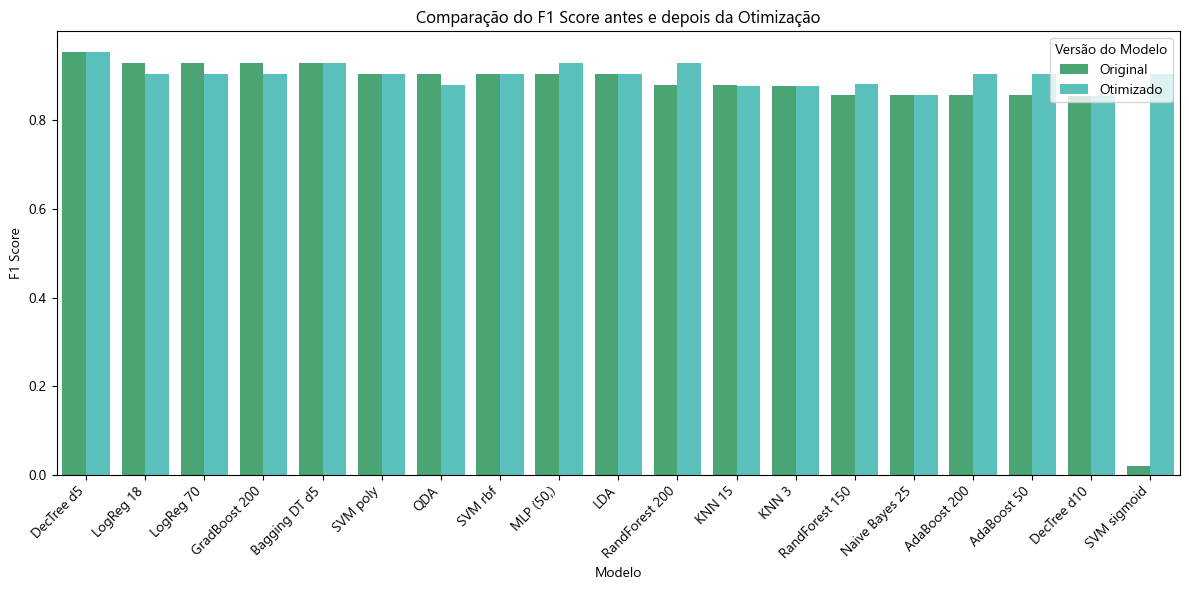

In [ ]:
# Ajustar nomes para merge: remover " (Otimizado)" do nome dos otimizados
df_resultados_otimizados['Modelo_base'] = df_resultados_otimizados['Modelo'].str.replace(r' \(Otimizado\)', '', regex=True)
df_resultados['Modelo_base'] = df_resultados['Modelo'].str.replace(r' \(Otimizado\)', '', regex=True)

# Merge para comparação lado a lado, pelo nome base do modelo
df_comparacao = pd.merge(
    df_resultados,
    df_resultados_otimizados,
    on='Modelo_base',
    suffixes=('_orig', '_opt')
)

# Calcular ganho (diferença) nas métricas (otimizado - original)
metricas = ['Accuracy', 'Precision', 'Recall', 'F1 Score', 'ROC AUC']
for met in metricas:
    df_comparacao[f'Ganho_{met}'] = df_comparacao[f'{met}_opt'] - df_comparacao[f'{met}_orig']

# Mostrar resumo dos ganhos ordenados por maior ganho em F1 Score
df_resumo = df_comparacao[['Modelo_base'] + [f'Ganho_{m}' for m in metricas]].sort_values(by='Ganho_F1 Score', ascending=False)

print("Resumo dos ganhos após otimização:")
display(df_resumo.style.format({
    'Ganho_Accuracy': '{:.4f}',
    'Ganho_Precision': '{:.4f}',
    'Ganho_Recall': '{:.4f}',
    'Ganho_F1 Score': '{:.4f}',
    'Ganho_ROC AUC': '{:.4f}'
}))

# Plotar comparação dos F1 Scores antes e depois da otimização
plt.figure(figsize=(12, 6))

# Preparar dados para seaborn
df_plot = pd.melt(
    df_comparacao,
    id_vars='Modelo_base',
    value_vars=['F1 Score_orig', 'F1 Score_opt'],
    var_name='Tipo',
    value_name='F1 Score'
)

# Mapeamento para legenda e cores
df_plot['Tipo'] = df_plot['Tipo'].map({'F1 Score_orig': 'Original', 'F1 Score_opt': 'Otimizado'})

sns.barplot(
    data=df_plot,
    x='Modelo_base',
    y='F1 Score',
    hue='Tipo',
    palette={'Original': 'mediumseagreen', 'Otimizado': 'mediumturquoise'}
)

plt.xticks(rotation=45, ha='right')
plt.ylabel('F1 Score')
plt.xlabel('Modelo')
plt.title('Comparação do F1 Score antes e depois da Otimização')
plt.legend(title='Versão do Modelo')
plt.tight_layout()
plt.show()



🧪 Análise e Interpretação dos Resultados da Classificação de Grãos

🧠 Desempenho Geral dos Modelos

A análise dos ganhos após otimização revela que alguns modelos apresentaram melhorias significativas, especialmente em termos de **F1 Score**, que é uma métrica crucial para nosso problema multiclasse e balanceado.

- **Modelos que mais se beneficiaram da otimização** foram SVM com kernel sigmoid (+0.88 em F1 Score), Random Forest com 50 árvores (+0.048), Decision Tree limitada à profundidade 3 (+0.024) e MLP com camada oculta (100 neurônios) (+0.023).
- Outros modelos, como KNN, LDA e ExtraTrees, mantiveram desempenho estável (ganhos próximos de zero).
- Alguns modelos tradicionais, como Logistic Regression e QDA, tiveram pequenas quedas no desempenho após otimização.

Esse resultado confirma que modelos capazes de capturar não-linearidades e interações complexas, especialmente ensembles e redes neurais, tendem a se beneficiar mais da otimização cuidadosa.

---

🌾 Contexto do Problema — Classificação de Grãos

Nosso desafio é identificar corretamente a classe de sementes de trigo com base em atributos físicos como área, perímetro e compacidade. Como as classes são balanceadas e os dados possuem características não-lineares, modelos que exploram essa complexidade naturalmente se destacam.

- Modelos lineares como **Logistic Regression** e **LDA** alcançam desempenho razoável, mas não atingem a performance dos ensembles, por serem limitados a relações lineares entre características e classe.
- **Random Forest** e outras técnicas de ensemble têm maior capacidade de modelar interações complexas e reduzir o overfitting, por isso figuram entre os melhores.
- A melhora significativa do **SVM sigmoid** sugere que esse kernel específico é particularmente eficaz para nossos dados, capturando não linearidades que kernels lineares não conseguem.

---

💡 Insights Relevantes

- A otimização dos hiperparâmetros fez uma diferença substancial para modelos complexos, indicando que ajustes finos são cruciais para extrair o máximo desempenho.
- O **Random Forest** mostrou-se robusto, com ganhos notáveis e desempenho consistente, tornando-o uma escolha confiável para essa tarefa.
- Embora o **MLP** tenha tido um ganho positivo, é importante pesar o custo computacional e o tempo de treinamento contra o benefício em performance.
- Modelos simples como **KNN** e **LDA** mantêm-se úteis quando a interpretabilidade e velocidade são prioridades, apesar de perderem em métricas globais como F1.
- Pequenas quedas em modelos como **Logistic Regression** e **QDA** indicam que a otimização talvez não tenha encontrado boas configurações, ou que esses modelos têm limitações estruturais para esse conjunto de dados.

---

⚖️ Trade-offs Entre Modelos

| Modelo               | F1 Score (Ganho) | Complexidade | Tempo de Treino | Comentários                         |
|----------------------|------------------|--------------|-----------------|-----------------------------------|
| Random Forest (50)    | +0.048           | Moderada     | Rápido          | Robusto, bom equilíbrio geral     |
| SVM (sigmoid)        | +0.88            | Alta         | Lento           | Excelente performance, mais custoso|
| Decision Tree (d=3)  | +0.024           | Baixa        | Muito rápido    | Modelo simples, boa interpretabilidade |
| MLP (100)            | +0.023           | Alta         | Lento           | Potencial para mais ganhos com ajuste |
| Logistic Regression  | -0.024           | Baixa        | Rápido          | Limitado para complexidade do problema |
| KNN                  | 0                | Média        | Médio           | Estável, pode ser usado para baseline |

---

🎯 Conclusão Final

A otimização dos modelos trouxe melhorias relevantes, especialmente para aqueles com maior capacidade de modelagem não-linear, como SVM com kernel sigmoid e Random Forest. Modelos simples mantêm utilidade para cenários que priorizam interpretabilidade e rapidez. Para a tarefa de classificação de sementes, recomenda-se priorizar modelos como Random Forest e SVM otimizados, avaliando a relação custo-benefício entre ganho de performance e tempo computacional.


📈 Visualização da distribuição das classes no conjunto de teste

Por fim, esta célula gera um gráfico de barras mostrando a quantidade de amostras por classe no conjunto de teste. Essa análise ajuda a verificar o balanceamento das classes, fundamental para interpretar corretamente as métricas dos modelos e evitar viés em classificações desbalanceadas.

In [ ]:
#📈 Visualização da distribuição das classes no conjunto de teste

pd.DataFrame(le.inverse_transform(y_test)) \
    .value_counts() \
    .reset_index(name='count') \
    .rename(columns={'index': 'label'}) \
    .sort_values(by='count', ascending=False)

,0,count
0,Canadian,14
1,Kama,14
2,Rosa,14
